# MScFE 622 STOCHASTIC MODELING
**Group Work Project # 3**

**Introduction:**

This group project aims to apply reinforcement learning techniques to solve the portfolio selection problem. Inspired by Huo's research on risk-aware multi-armed bandit problems in portfolio selection, the project involves steps like selective reading, data collection, algorithm implementation, and performance comparison with Huo's results. By leveraging concepts like the Upper-Confidence Bound and epsilon-greedy algorithms, the team seeks to optimize portfolio selection using historical financial data. The ultimate objective is to evaluate the efficacy of these algorithms, particularly when applied to more recent data, thereby enhancing understanding of algorithmic trading strategies in real-world investment scenarios.

We will begin the task by loading the necessary Libraries:

### Loading the required Librarie

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import yfinance as yf
from numpy.random import seed
from numpy.random import rand
from scipy.cluster import hierarchy

[link text](https:// [link text](https:// [link text](https:// [link text](https://))))### Downloading and Exploring the Securities

At this phase of the project, team members are assigned individual tasks to progress towards applying reinforcement learning in portfolio selection.The task requires collaborative description of the portfolio selection problem as a multi-armed bandit problem and collecting sample data from Sep 2008 and Oct 2008, which includes gathering data for 15 financial institutions (JPM, WFC, BAC, C, GS, USB, MS, KEY, PNC, COF, AXP, PRU, SCHW, AFL, ALL) and  15 non-financial institutions (KR, PFE, XOM, WMT, DAL, CSCO, BKR, EQIX, DUK, NFLX, GE, APA, F, REGN, CMS). We then structured this data into a Python time series format, facilitating subsequent analysis and algorithm implementation. These initial steps lay the groundwork for the application of reinforcement learning techniques in portfolio optimization.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

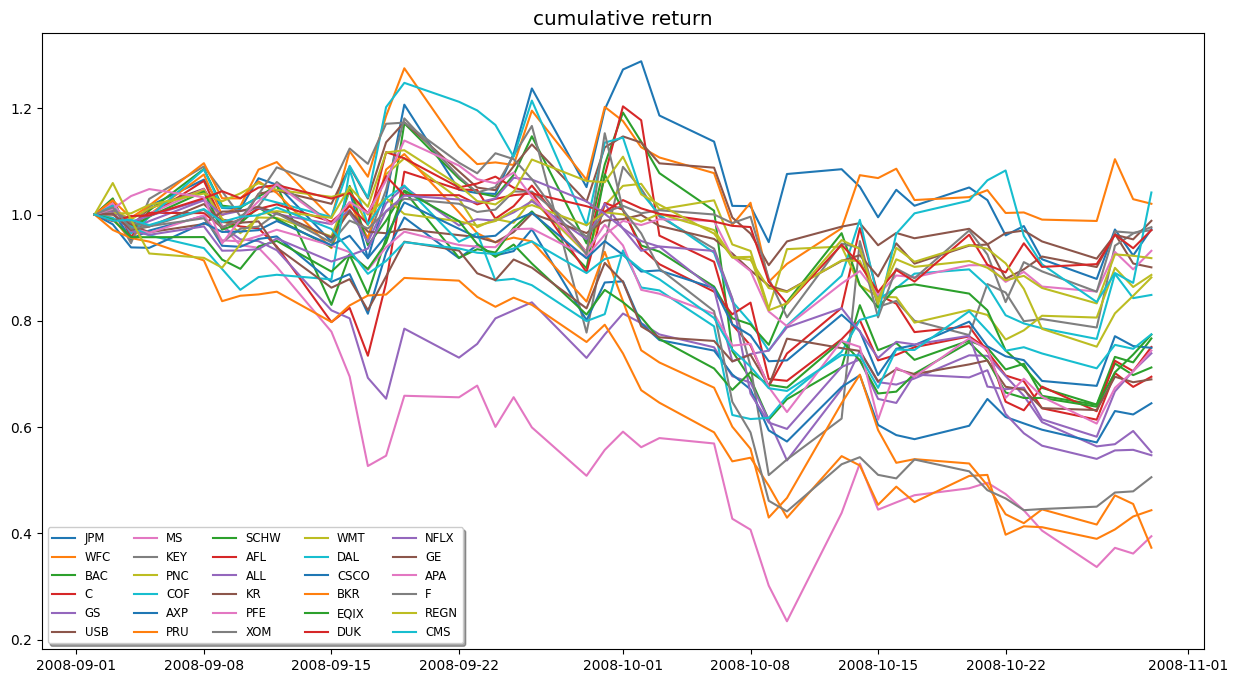

In [ ]:
tickers = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP",
           "PRU", "SCHW", "AFL", "ALL" , "KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "BKR",
           "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"
           ]

len(tickers)

start_date = "2008-09-01"
end_date = "2008-10-31"

df=pd.DataFrame()
df_ret=pd.DataFrame()
for tick in tickers:
  price=yf.download(tick, start=start_date, end=end_date)
  plt.plot(price["Adj Close"] / price["Adj Close"][0], label=tick)
  price=price.rename(columns={"Adj Close" : tick})
  price[tick+"ret"]=price[tick].pct_change()
  df=pd.concat([df, price[[tick]]], axis=1)
  df_ret=pd.concat([df, price[[tick+"ret"]]], axis=1)
pdata = df.to_numpy()
pdata_dates = pd.to_datetime(price.index, format = "%Y-%m-%d")
legend = plt.legend(loc="lower left", shadow=True, fontsize="small", ncol=5)
#legend_title = plt.gca().add_artist(plt.Text(0, 0, "Stock Tickers", fontsize="small", fontweight='bold'))
title="cumulative return"
plt.title(title, fontsize="x-large")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [ ]:
df=pd.DataFrame()
for tick in tickers:
  ydata=yf.download(tick, start=start_date, end=end_date)
  df[tick] = ydata["Adj Close"]
df.index = pd.to_datetime(ydata.index, format = "%Y-%m-%d")
df=df.pct_change()
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

JPM       WFC       BAC         C        GS       USB  \
Date                                                                     
2008-09-02       NaN       NaN       NaN       NaN       NaN       NaN   
2008-09-03  0.018466 -0.006408  0.030322  0.026164  0.013852  0.017918   
2008-09-04 -0.045328 -0.043212 -0.071602 -0.066803 -0.040034 -0.039454   
2008-09-05  0.044579  0.051567  0.053268  0.042077  0.014544  0.034439   
2008-09-08  0.049242  0.075641  0.077568  0.065548  0.039758  0.036653   

                  MS       KEY       PNC       COF  ...      CSCO       BKR  \
Date                                                ...                       
2008-09-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2008-09-03  0.021065  0.008730  0.009259  0.016474  ... -0.018527 -0.029061   
2008-09-04 -0.043396 -0.062156 -0.018484 -0.051030  ... -0.044187 -0.015640   
2008-09-05  0.025285  0.088087  0.021168  0.031848  ... -0.000898 -0.007122   
2008-09-08  0.046180  0.059368  0.033517  0.089913  ...  0.049865 -0.037384   

                EQIX       DUK      NFLX        GE       APA         F  \
Date                                                                     
2008-09-02       NaN       NaN       NaN       NaN       NaN       NaN   
2008-09-03 -0.009882 -0.012687  0.002270  0.001402  0.010721  0.013304   
2008-09-04 -0.033063  0.009929 -0.033646 -0.030451  0.023725 -0.039387   
2008-09-05 -0.000129  0.001157 -0.007030  0.006498  0.012724  0.004556   
2008-09-08  0.000258  0.032351  0.016521  0.043400 -0.014897  0.031746   

                REGN       CMS  
Date                            
2008-09-02       NaN       NaN  
2008-09-03  0.059281 -0.011756  
2008-09-04 -0.065138  0.001487  
2008-09-05 -0.064279 -0.009651  
2008-09-08 -0.008915  0.030734  

[5 rows x 30 columns]

### Portfolio Selection

In this task, we computed a 30 by 30 correlation matrix based on the daily returns of the downloaded securities. The correlation matrix serves as a fundamental tool for understanding the relationships between different securities within the portfolio. Additionally, we generated a heatmap visualization of the correlation matrix, providing a clear and intuitive representation of the correlations among the securities.

To facilitate portfolio management and decision-making, we decided to sort the securities based on their correlations. we opted for a hierarchical clustering approach, which organizes the securities into distinct groups based on their correlation patterns. By clustering securities with similar correlation profiles together, the group aims to create subsets of securities that exhibit similar behavior in the market. This approach enhances portfolio diversification and risk management by ensuring that assets with similar risk exposures are grouped together, allowing for more efficient allocation strategies. Ultimately, the chosen criteria for sorting the 30 stocks revolve around maximizing diversification benefits while minimizing potential systemic risks within the portfolio.

In [ ]:
ret_cor = df.corr()
ret_cor

JPM       WFC       BAC         C        GS       USB        MS  \
JPM   1.000000  0.788109  0.840628  0.800969  0.457663  0.874266  0.305244   
WFC   0.788109  1.000000  0.830237  0.736664  0.507067  0.843000  0.429167   
BAC   0.840628  0.830237  1.000000  0.904035  0.661774  0.795647  0.539035   
C     0.800969  0.736664  0.904035  1.000000  0.623447  0.735773  0.550132   
GS    0.457663  0.507067  0.661774  0.623447  1.000000  0.395573  0.814933   
USB   0.874266  0.843000  0.795647  0.735773  0.395573  1.000000  0.359952   
MS    0.305244  0.429167  0.539035  0.550132  0.814933  0.359952  1.000000   
KEY   0.516240  0.695693  0.753169  0.742450  0.595028  0.589449  0.531887   
PNC   0.831849  0.745078  0.653550  0.616419  0.193895  0.864231  0.168171   
COF   0.719847  0.805570  0.799047  0.790940  0.487569  0.821942  0.492566   
AXP   0.676410  0.747506  0.763410  0.748182  0.695820  0.717221  0.711553   
PRU   0.478625  0.702991  0.618638  0.615755  0.595896  0.669307  0.679493   
SCHW  0.785205  0.707921  0.640607  0.584780  0.447185  0.759740  0.461798   
AFL   0.590524  0.727467  0.619690  0.630457  0.453743  0.751178  0.536012   
ALL   0.444594  0.488070  0.579900  0.520852  0.610765  0.584094  0.680439   
KR    0.584293  0.552958  0.626818  0.549759  0.527767  0.517723  0.568998   
PFE   0.620028  0.683808  0.744738  0.691016  0.656893  0.705248  0.772369   
XOM   0.460087  0.527575  0.535174  0.488330  0.585311  0.562321  0.639848   
WMT   0.520155  0.570001  0.543592  0.480745  0.438044  0.614753  0.558746   
DAL   0.526229  0.466344  0.564399  0.458827  0.320428  0.475460  0.434232   
CSCO  0.682543  0.648629  0.710793  0.636118  0.600028  0.691789  0.618104   
BKR   0.317198  0.429354  0.449557  0.383236  0.583256  0.420247  0.669138   
EQIX  0.637278  0.564222  0.628118  0.607205  0.587596  0.629265  0.577915   
DUK   0.343695  0.390886  0.365083  0.365735  0.404720  0.420875  0.572371   
NFLX  0.529818  0.378512  0.538078  0.474861  0.226108  0.459025  0.296235   
GE    0.782299  0.689847  0.704273  0.697408  0.308085  0.721771  0.246726   
APA   0.494772  0.529243  0.579602  0.514996  0.597169  0.552584  0.666600   
F     0.486592  0.659980  0.623456  0.532483  0.500632  0.646822  0.590733   
REGN  0.558347  0.541780  0.541941  0.518864  0.453065  0.546532  0.533809   
CMS   0.567143  0.482438  0.637232  0.591420  0.594519  0.575621  0.637429   

           KEY       PNC       COF  ...      CSCO       BKR      EQIX  \
JPM   0.516240  0.831849  0.719847  ...  0.682543  0.317198  0.637278   
WFC   0.695693  0.745078  0.805570  ...  0.648629  0.429354  0.564222   
BAC   0.753169  0.653550  0.799047  ...  0.710793  0.449557  0.628118   
C     0.742450  0.616419  0.790940  ...  0.636118  0.383236  0.607205   
GS    0.595028  0.193895  0.487569  ...  0.600028  0.583256  0.587596   
USB   0.589449  0.864231  0.821942  ...  0.691789  0.420247  0.629265   
MS    0.531887  0.168171  0.492566  ...  0.618104  0.669138  0.577915   
KEY   1.000000  0.424826  0.730262  ...  0.459450  0.313700  0.373145   
PNC   0.424826  1.000000  0.669605  ...  0.584305  0.282034  0.536753   
COF   0.730262  0.669605  1.000000  ...  0.743122  0.480812  0.638253   
AXP   0.702464  0.585922  0.822356  ...  0.749864  0.647342  0.727827   
PRU   0.585881  0.536462  0.746519  ...  0.680757  0.592872  0.622789   
SCHW  0.376911  0.716408  0.721644  ...  0.758512  0.528399  0.729227   
AFL   0.636889  0.655530  0.816762  ...  0.676832  0.638862  0.723400   
ALL   0.540216  0.371973  0.669023  ...  0.646922  0.566802  0.525361   
KR    0.477901  0.444458  0.569169  ...  0.718893  0.533619  0.502407   
PFE   0.647275  0.548910  0.713353  ...  0.836211  0.659614  0.661422   
XOM   0.409046  0.438570  0.589709  ...  0.811045  0.842395  0.709798   
WMT   0.461172  0.507132  0.674617  ...  0.836177  0.628750  0.578695   
DAL   0.409929  0.393866  0.509135  ...  0.456372  0.321727  0.448641   
CSCO  0.459450  0.584305  0.743122  ...  1.000000  0.644368

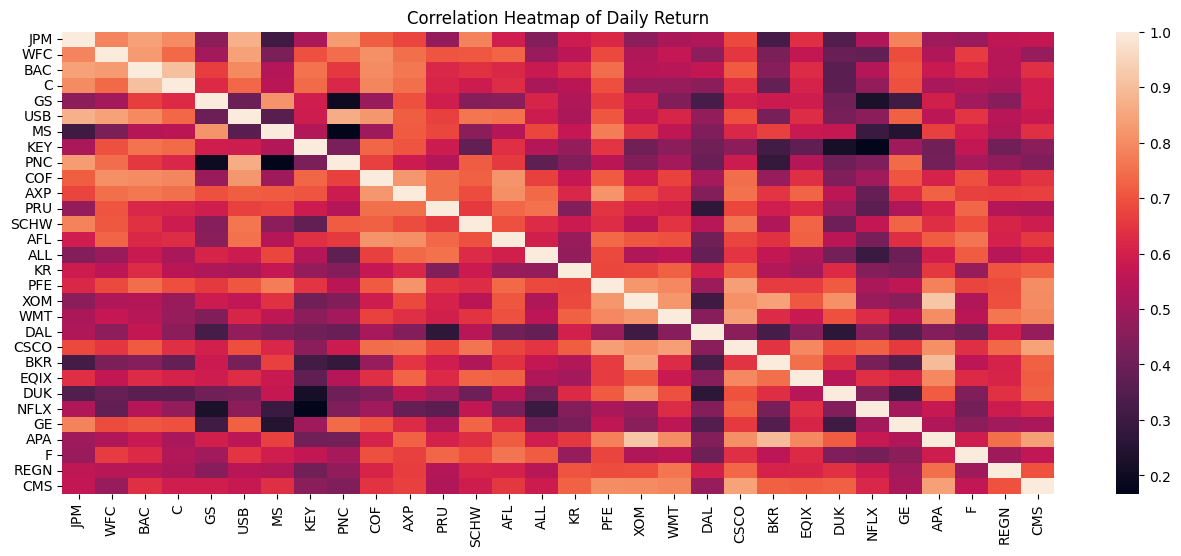

In [ ]:
plt.figure(figsize=(16, 6))

# Create the heatmap plot
sns.heatmap(ret_cor)

# Set the title
plt.title("Correlation Heatmap of Daily Return")

# Show the plot
plt.show()

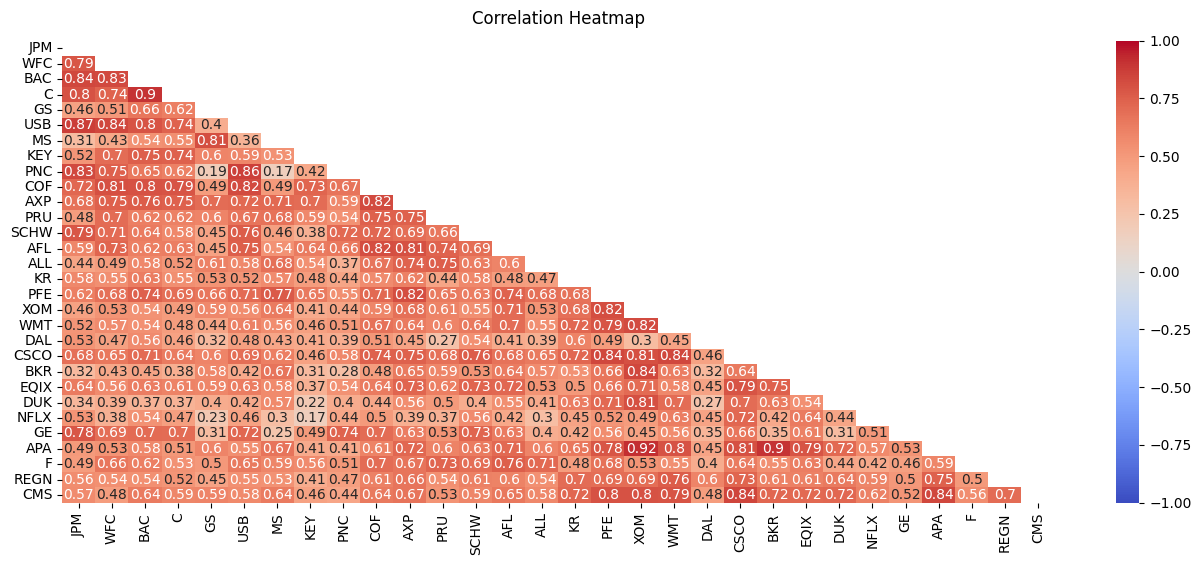

In [ ]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(ret_cor))
heatmap =sns.heatmap(ret_cor, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize" : 12}, pad = 12);

<Figure size 800x300 with 0 Axes>

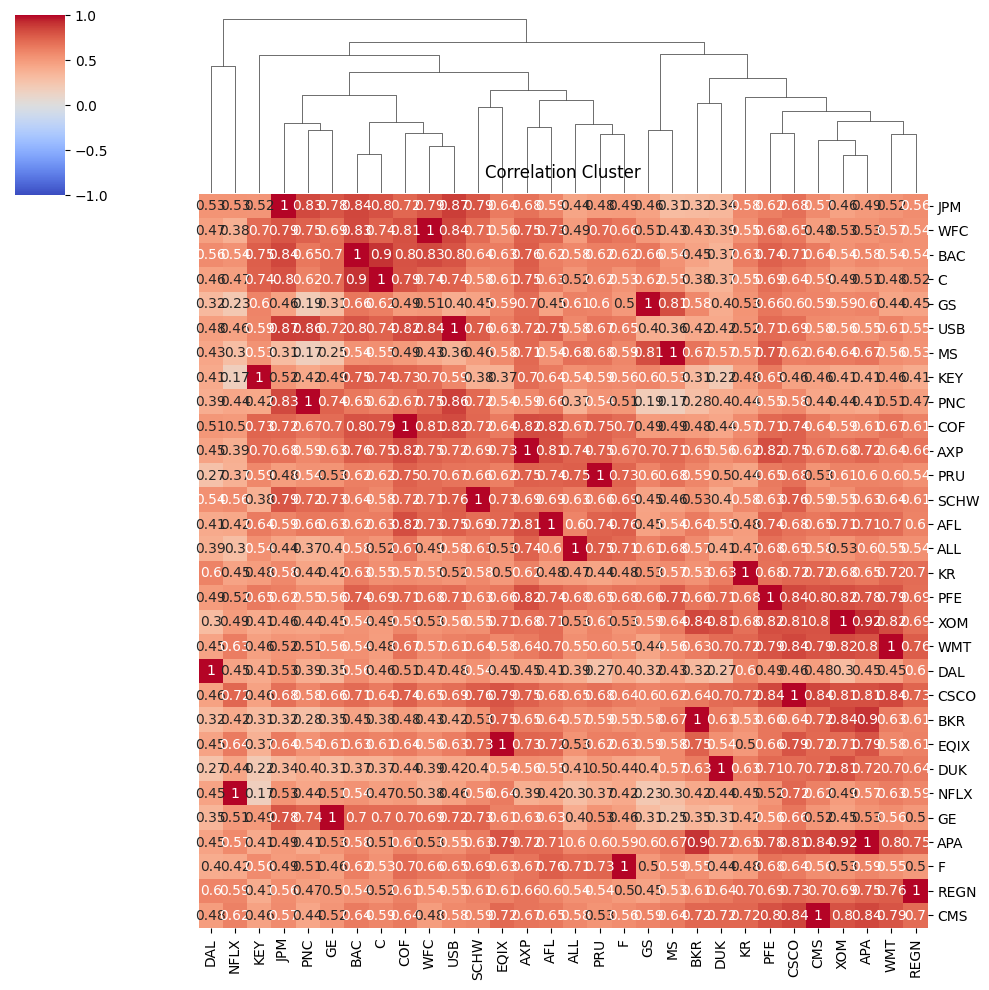

In [ ]:
plt.figure(figsize=(8,3))
mask = np.triu(np.ones_like(ret_cor))
clustermap =sns.clustermap(ret_cor, row_cluster=False, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
# Setting the title for the clustermap
clustermap.ax_heatmap.set_title("Correlation Cluster", fontdict={"fontsize": 12}, pad=12)

plt.show()

#### **Analyzing Risk and Return Profiles of Clustered Securities**

In this task, we aim to analyze the risk and return profiles of securities grouped into clusters. We start by clustering the securities based on correlation of their daily historical returns using hierarchical clustering. The clustering process groups securities that exhibit similar return correlation patterns together, providing insights into their relationships and potential similarities in market behavior.

1. **Clustering:** We perform hierarchical clustering on the correlation of historical returns of the securities. This clustering method groups securities into clusters based on their similarities in return trends and behavior. Each cluster represents a group of securities that tend to move together in the market.

2. **Risk and Return Analysis:** For each cluster identified, we conduct a comprehensive analysis of the risk and return profiles of the securities within each cluster. This analysis includes calculating metrics such as average return, volatility, and Sharpe ratio for each security. These metrics help us understand the risk-return trade-offs associated with each cluster, providing valuable insights into the performance and risk characteristics of the securities.

3. **Interpretation:** Finally, we interpret the results of the analysis, drawing conclusions about the risk and return profiles of the clustered securities. We analyze the average returns, volatility, and Sharpe ratio for each cluster, comparing them to understand the differences in performance and risk-adjusted returns. Additionally, we examine the average pairwise correlation within each cluster to understand the degree of correlation among securities within the same cluster.

<ipython-input-8-bb10b3e08a04>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(pairwise_distances, method='ward')


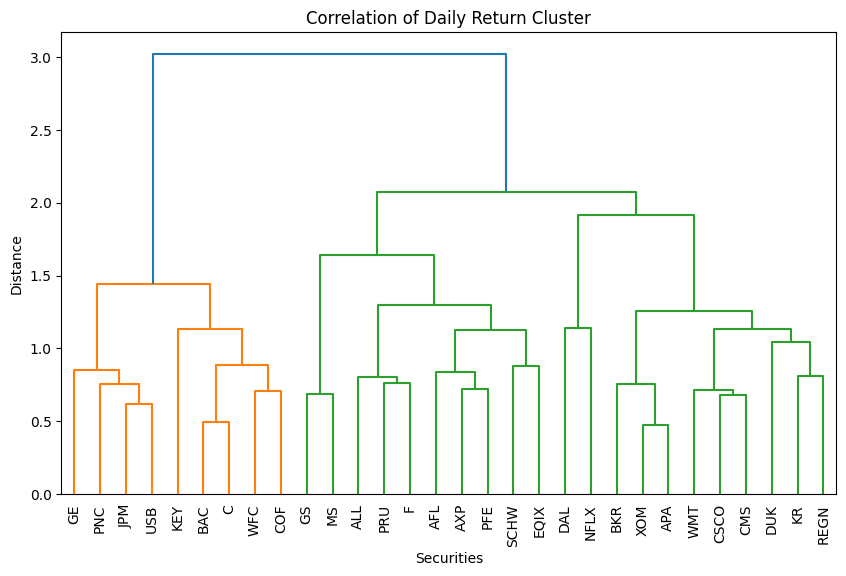

In [ ]:
# Calculate pairwise distances
pairwise_distances = np.sqrt(1 - ret_cor)

# Perform hierarchical clustering
linkage = hierarchy.linkage(pairwise_distances, method='ward')

# Determine the optimal number of clusters using a dendrogram
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(linkage, labels=tickers, leaf_rotation=90)
plt.title('Correlation of Daily Return Cluster')
plt.ylabel('Distance')
plt.xlabel('Securities')
plt.show()

In [ ]:
# Assuming 'optimal_num_clusters' is the optimal number of clusters determined from the dendrogram
# And 'original_data' is your original dataset containing the securities

clusters = hierarchy.fcluster(linkage, 2, criterion='maxclust')

# Create a dictionary to store securities in each cluster
clustered_securities = {}
for i, security in enumerate(df.columns):
    cluster = clusters[i]
    if cluster not in clustered_securities:
        clustered_securities[cluster] = []
    clustered_securities[cluster].append(security)

# Print the securities in each cluster
for cluster, securities in clustered_securities.items():
    print(f'Cluster {cluster}: {", ".join(securities)}')


Cluster 1: JPM, WFC, BAC, C, USB, KEY, PNC, COF, GE
Cluster 2: GS, MS, AXP, PRU, SCHW, AFL, ALL, KR, PFE, XOM, WMT, DAL, CSCO, BKR, EQIX, DUK, NFLX, APA, F, REGN, CMS


In [ ]:
# Define the clusters as provided
clusters = {
    1: ['JPM', 'WFC', 'BAC', 'C', 'USB', 'KEY', 'PNC', 'COF', 'GE'],
    2: ['GS', 'MS', 'AXP', 'PRU', 'SCHW', 'AFL', 'ALL', 'KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'BKR', 'EQIX', 'DUK', 'NFLX', 'APA', 'F', 'REGN', 'CMS']
}

# Print the dictionary
print(clusters)


{1: ['JPM', 'WFC', 'BAC', 'C', 'USB', 'KEY', 'PNC', 'COF', 'GE'], 2: ['GS', 'MS', 'AXP', 'PRU', 'SCHW', 'AFL', 'ALL', 'KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'BKR', 'EQIX', 'DUK', 'NFLX', 'APA', 'F', 'REGN', 'CMS']}


In [ ]:
# Risk and Return Analysis
cluster_metrics = {}
for cluster, securities in clusters.items():
    cluster_returns = df[securities]
    avg_return = cluster_returns.mean()
    volatility = cluster_returns.std()
    excess_returns = cluster_returns.mean()  # Assuming risk-free rate is zero for simplicity
    sharpe_ratio = excess_returns / volatility

    cluster_metrics[cluster] = {
        'Average Return': avg_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    }



# Correlation Analysis
cluster_correlations = {}
for cluster, securities in clusters.items():
    cluster_returns = df[securities]
    pairwise_correlations = cluster_returns.corr()
    avg_correlation = pairwise_correlations.mean().mean()

    cluster_correlations[cluster] = avg_correlation

# Print or visualize the results
for cluster, metrics in cluster_metrics.items():
    print(f'Cluster {cluster}:')
    print(pd.DataFrame(metrics))

for cluster, avg_correlation in cluster_correlations.items():
    print(f'Average pairwise correlation in Cluster {cluster}: {avg_correlation}')


Cluster 1:
     Average Return  Volatility  Sharpe Ratio
JPM        0.002304    0.078245      0.029442
WFC        0.002759    0.068376      0.040345
BAC       -0.003077    0.099449     -0.030940
C         -0.004175    0.096793     -0.043135
USB       -0.001354    0.048241     -0.028069
KEY        0.008212    0.136987      0.059950
PNC       -0.001294    0.057035     -0.022691
COF       -0.000850    0.079223     -0.010730
GE        -0.007468    0.052666     -0.141804
Cluster 2:
      Average Return  Volatility  Sharpe Ratio
GS         -0.011093    0.078768     -0.140837
MS         -0.009401    0.177123     -0.053078
AXP        -0.007992    0.070095     -0.114020
PRU        -0.018070    0.104853     -0.172337
SCHW       -0.003709    0.073896     -0.050187
AFL        -0.004483    0.068753     -0.065210
ALL        -0.012234    0.063787     -0.191789
KR          0.000149    0.029944      0.004985
PFE        -0.000961    0.038600     -0.024893
XOM         0.001122    0.061580      0.018221
W

**Result**:
Cluster 1 appears to consist of securities with higher average returns, lower volatility, and higher correlation, suggesting they may represent a group of financially robust companies or belong to similar industries. In contrast, Cluster 2 comprises securities with lower average returns, higher volatility, and slightly lower correlation, indicating they may represent a more diverse set of companies or industries with varying performance levels.

#### Exracting the data set of each Cluster

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


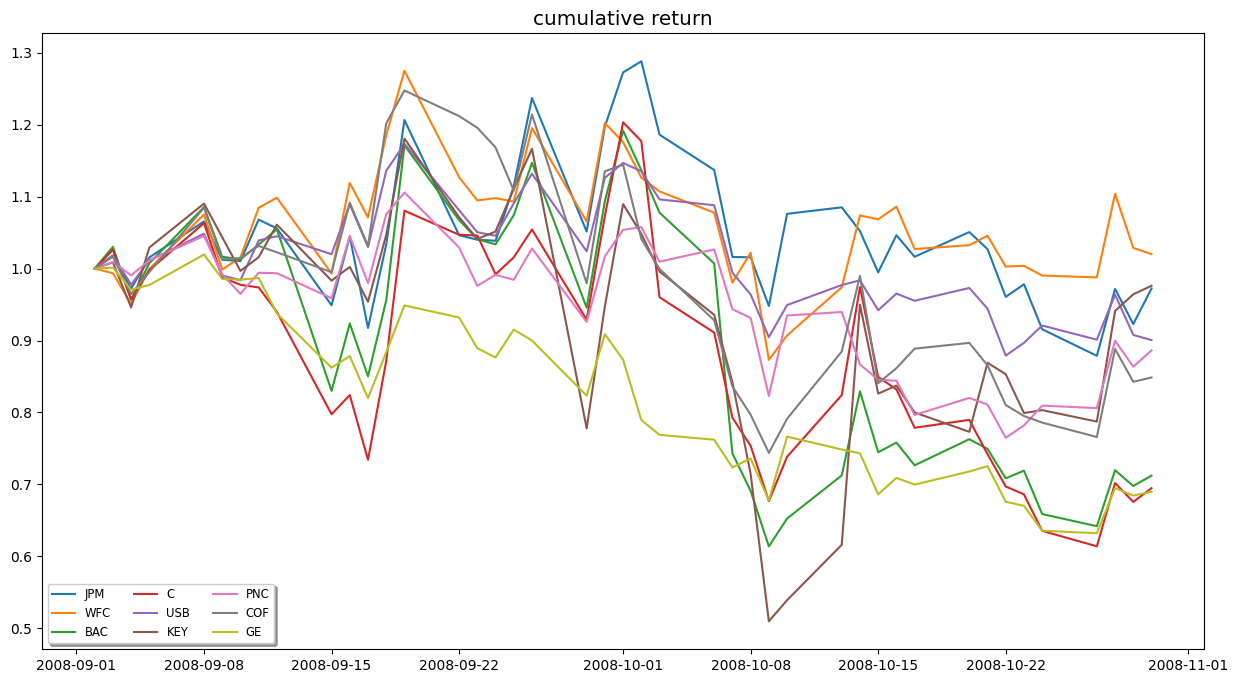

In [ ]:
tickers_1 = ['JPM', 'WFC', 'BAC', 'C', 'USB', 'KEY', 'PNC', 'COF', 'GE']

len(tickers_1)

start_date = "2008-09-01"
end_date = "2008-10-31"

df_1=pd.DataFrame()
df_ret_1=pd.DataFrame()
for tick in tickers_1:
  price_1=yf.download(tick, start=start_date, end=end_date)
  plt.plot(price_1["Adj Close"] / price_1["Adj Close"][0], label=tick)
  price_1=price_1.rename(columns={"Adj Close" : tick})
  price_1[tick+"ret"]=price_1[tick].pct_change()
  df_1=pd.concat([df_1, price_1[[tick]]], axis=1)
  df_ret_1=pd.concat([df_1, price_1[[tick+"ret"]]], axis=1)
pdata_1 = df_1.to_numpy()
pdata_dates_1 = pd.to_datetime(price_1.index, format = "%Y-%m-%d")
legend = plt.legend(loc="lower left", shadow=True, fontsize="small", ncol=3)
#legend_title = plt.gca().add_artist(plt.Text(0, 0, "Stock Tickers", fontsize="small", fontweight='bold'))
title="cumulative return"
plt.title(title, fontsize="x-large")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

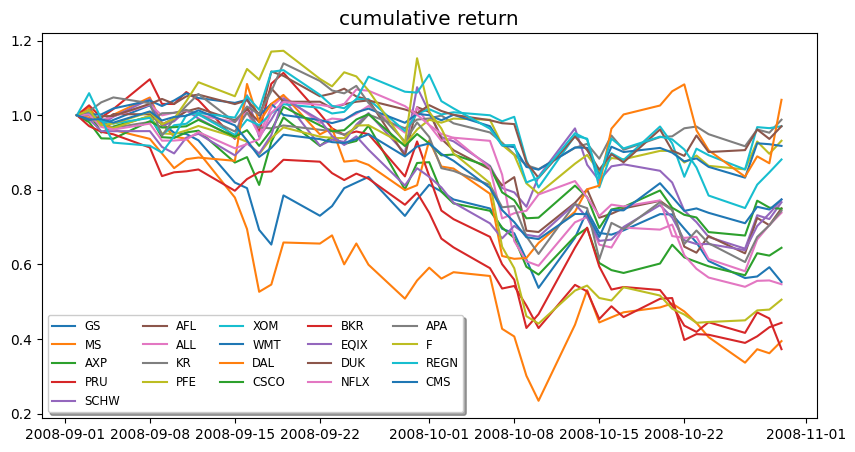

In [ ]:
tickers_2 = ['GS', 'MS', 'AXP', 'PRU', 'SCHW', 'AFL', 'ALL', 'KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'BKR', 'EQIX', 'DUK', 'NFLX', 'APA', 'F', 'REGN', 'CMS']

len(tickers_2)

start_date = "2008-09-01"
end_date = "2008-10-31"

df_2=pd.DataFrame()
df_ret_2=pd.DataFrame()
for tick in tickers_2:
  price_2=yf.download(tick, start=start_date, end=end_date)
  plt.plot(price_2["Adj Close"] / price_2["Adj Close"][0], label=tick)
  price_2=price_2.rename(columns={"Adj Close" : tick})
  price_2[tick+"ret"]=price_2[tick].pct_change()
  df_2=pd.concat([df_2, price_2[[tick]]], axis=1)
  df_ret_2=pd.concat([df_2, price_2[[tick+"ret"]]], axis=1)
pdata_2 = df_2.to_numpy()
pdata_dates_2 = pd.to_datetime(price_2.index, format = "%Y-%m-%d")
legend = plt.legend(loc="lower left", shadow=True, fontsize="small", ncol=5)
#legend_title = plt.gca().add_artist(plt.Text(0, 0, "Stock Tickers", fontsize="small", fontweight='bold'))
title="cumulative return"
plt.title(title, fontsize="x-large")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

## K - Bandit Algorithm

In this task, we're tackling the K-bandit problem for stock selection, where our aim is to effectively allocate resources among a set of 30 stocks, comprising 15 financial and 15 non-financial entities. We understand the challenge ahead: dynamically choosing the most promising stocks over time. Each stock serves as a "bandit arm" in this problem, and our task involves continuously evaluating and updating our selection strategy based on both historical performance and prevailing market conditions. To address this, we're planning to employ K-bandit algorithms, such as Upper-Confidence Bound (UCB) or epsilon-greedy methods. By doing so, we'll systematically explore and exploit the potential of different stocks, ensuring a balanced approach between exploration and exploitation to optimize our portfolio's performance.\

Firstly, we will define the two funcions which are the core steps of the algorithm:
> * an optimal action choice given information about the past
> * an updating of the expected reward from choosing the given action.

##### **Defining the functions that govern the bandit problem**

In [ ]:
# Define the functions that govern the bandit problem

def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new


## UCB WEIGHTED ALGORITHM

The Upper Confidence Bound (UCB) algorithm is a popular approach in multi-armed bandit problems where a learner in this case an ivestor needs to decide which action to take in orde (which stock to buy) to maximize cumulative rewards (returns). The algorithm balances exploration and exploitation by selecting actions based on a combination of their estimated value and uncertainty.

In this task, we are going to perform the algorithm on the 30 stocks first and then on the selected portfolios namely cluster 1 and 2. Using a holding period of 1 day, we are going to fix an $\epsilon$-greedy policy that uses $\varepsilon=0.1$. Then, we are going to compare the performance of the updating policy that averages across the past history of rewards and the updating policy that uses a fixed parameter $\alpha=0.85$. We will also adjust the degree of "unexploration" of the action relative to the steps completed with the introduction of UBC_WEIGHT= 2.

##### **THE PSEUDOCODE FOR THE ALGORITHM**

**Pseudocode Description of UCB Algorithm**

1. **Define optimal_action Function:**
    - Chooses action randomly with probability epsilon, otherwise selects action with maximum q-value.
   
2. **Define reward_update Function:**
    - Updates q-values based on chosen action and received reward using learning rate `alpha`.

3. **Bandit Problem Parameters:**
    - NK: Number of stocks
    - EPSILON: Exploration rate
    - ALPHA: Learning rate
    - UBC_WEIGHT: Weight for Upper Confidence Bound exploration
    - NEPISODES: Number of episodes
    - HOLD: Number of days for holding a stock
    - TMAX: Maximum number of time steps

4. **Initialize Arrays:**
    - reward_avg: Average rewards array
    - optimal_avg: Average optimal actions array
    - reward_queue: Queue for storing rewards and actions for holding period

5. **Loop Over Episodes:**
    - For each episode:
        - Initialize q-values, number of actions, and UCB-adjusted q-values.
        
        - Loop over time steps:
            - Choose action based on epsilon-greedy strategy.
            - Compute reward as return over holding period.
            - Update q-values using reward_update.
            - Perform UCB adjustment for q-values.
            - Update reward queue.
            - Update average reward and optimal action arrays.

6. **Output:**
    - reward_avg: Average rewards over time steps
    - optimal_avg: Proportion of optimal actions chosen over time steps


##### Algorithm on all set of Data

In [1]:
# Bandit problem for stock selection

NK = pdata.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

# New Parameter
UBC_WEIGHT= 2  # degree of exploration parameter

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata[tt + HOLD, aa_opt] - pdata[tt, aa_opt]) / pdata[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        #qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/nactions[aa_opt])
        #print(qvalue)
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            # If an action has not been visited, simply give it maximum value across actions
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UBC_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata[tt + HOLD, :] - pdata[tt, :]) / pdata[tt, :])) / NEPISODES  # noQA E203

NameError: name 'pdata' is not defined

In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]],(pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers, loc="upper left", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.max((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

##### Algorithm on cluster 1 Securities

In [ ]:
# Bandit problem for stock selection

NK = pdata_1.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = pdata_1.shape[0] - HOLD

# New Parameter
UBC_WEIGHT= 2  # degree of exploration parameter

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_1[tt + HOLD, aa_opt] - pdata_1[tt, aa_opt]) / pdata_1[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        #qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/nactions[aa_opt])
        #print(qvalue)
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            # If an action has not been visited, simply give it maximum value across actions
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UBC_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_1[tt + HOLD, :] - pdata_1[tt, :]) / pdata_1[tt, :])) / NEPISODES  # noQA E203

In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],(pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_1, loc="upper left", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.max((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_1[tt + HOLD - 1, :] - pdata_1[tt - 1, :]) / pdata_1[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#### Algorithm on cluster 2 Securities

In [ ]:
# Bandit problem for stock selection

NK = pdata_2.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = pdata_2.shape[0] - HOLD

# New Parameter
UBC_WEIGHT= 2  # degree of exploration parameter

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_2[tt + HOLD, aa_opt] - pdata_2[tt, aa_opt]) / pdata_2[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        #qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/nactions[aa_opt])
        #print(qvalue)
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            # If an action has not been visited, simply give it maximum value across actions
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UBC_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_2[tt + HOLD, :] - pdata_2[tt, :]) / pdata_2[tt, :])) / NEPISODES  # noQA E203

In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],(pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_2, loc="upper left", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.max((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_2[tt + HOLD - 1, :] - pdata_2[tt - 1, :]) / pdata_2[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

## EPSILON - GREEDY ALGORITHM

In the epsilon-greedy algorithm for the stock selection K-armed bandit problem, we balance exploration and exploitation by choosing between two actions at each time step: exploration and exploitation. With a parameter epsilon (ε), we decide whether to explore new stocks randomly or exploit the current best-performing stock. If a random number drawn from a uniform distribution is less than epsilon, we explore by selecting a random stock. Otherwise, with probability 1-ε, we exploit by selecting the stock with the highest estimated value based on historical returns. This approach allows us to gradually shift from exploration to exploitation as we gather more data, ultimately aiming to maximize our portfolio's returns over time.

In this task, we are going to perform the algorithm on the 30 stocks first and then on the selected portfolios namely cluster 1 and 2. Using a holding period of 1 day, we are going to fix an $\epsilon$-greedy policy that uses $\varepsilon=0.1$. Then, we are going to compare the performance of the updating policy that averages across the past history of rewards and the updating policy that uses a fixed parameter $\alpha=0.85$.

##### **Epsilon-Greedy Algorithm for Stock Selection (Pseudocode)**

**Parameters:**
- NK: Number of stocks
- ε: Exploration rate
- α: Learning rate
- NEPISODES: Number of episodes
- HOLD: Number of days for holding a stock
- TMAX: Maximum number of time steps

**Algorithm:**

1. **Function**
optimal_action(qvalues, ε):
   - If random() < ε:
       - Return random choice
   - Else:
       - Return argmax(qvalues)

2. **Function**
reward_update (action, reward, qvalues, α):
   - qvalues[action] += α * (reward - qvalues[action])
   - Return updated qvalues

3. Initialize arrays reward_avg, optimal_avg, reward_queue

4. For each run in NEPISODES:
   - Initialize qvalue, nactions
   - For each tt in TMAX:
       - aa_opt = optimal_action(qvalue, ε)
       - nactions[aa_opt] += 1
       - Compute reward as return over holding period
       - Update qvalue using reward_update function
       - Update reward_queue
       - Update reward_avg and optimal_avg


##### Epsilon-Greedy Algorithm on all set of Data

In [ ]:
# Bandit problem for stock selection
NK = pdata.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata[tt + HOLD, aa_opt] - pdata[tt, aa_opt]) / pdata[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata[tt + HOLD, :] - pdata[tt, :]) / pdata[tt, :])) / NEPISODES

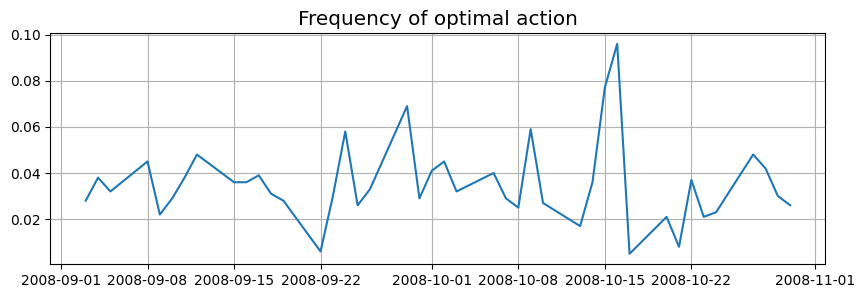

In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

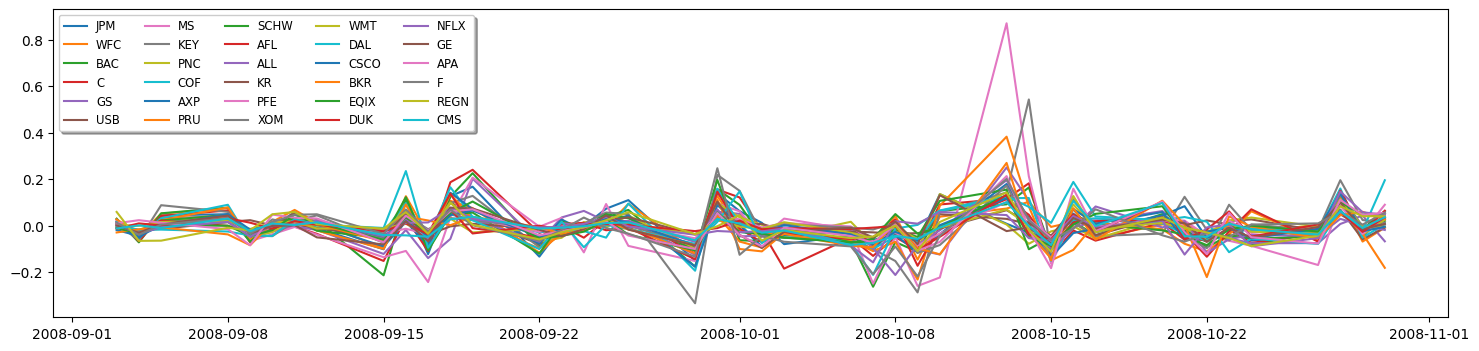

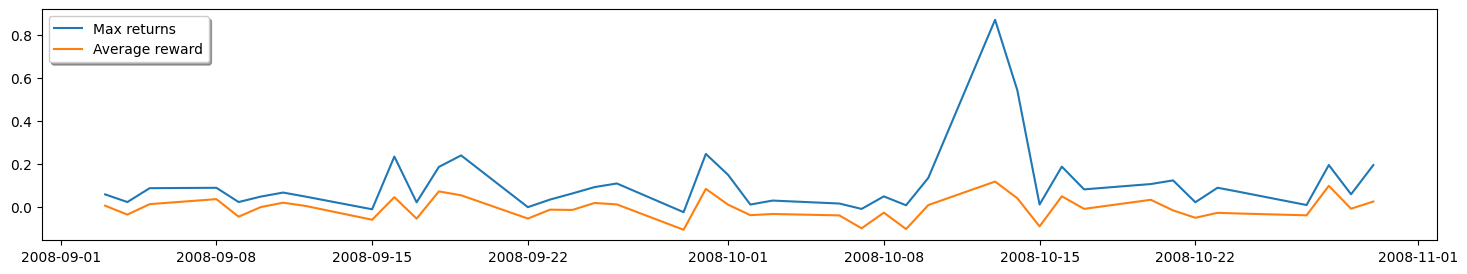

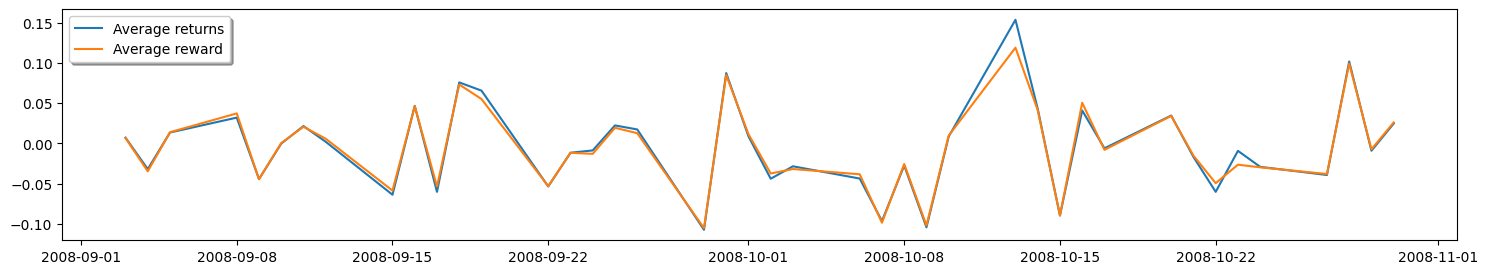

0.03538095238095241
-0.6442652921278703 0.8659084678331943
-0.6950809297888669 0.8144595592865563


In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]],(pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers, loc="upper left", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.max((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

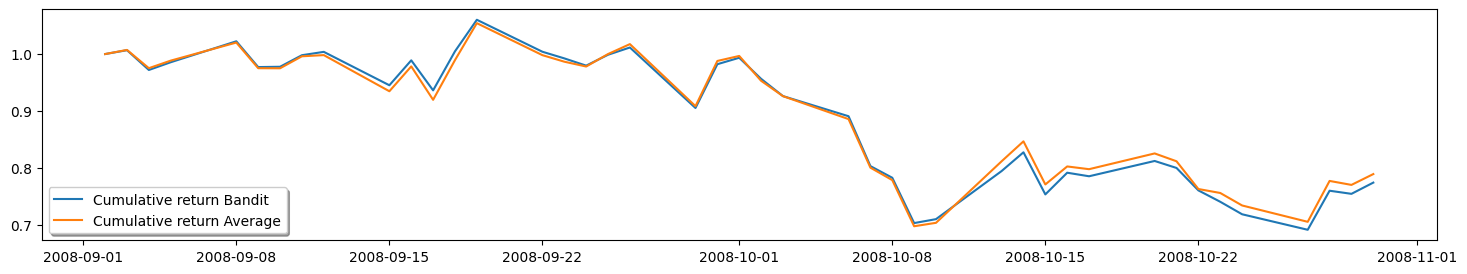

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

##### Epsilon-Greedy Algorithm on Cluster 1 Data

In [ ]:
# Bandit problem for stock selection
NK = pdata_1.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = pdata_1.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_1[tt + HOLD, aa_opt] - pdata_1[tt, aa_opt]) / pdata_1[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_1[tt + HOLD, :] - pdata_1[tt, :]) / pdata_1[tt, :])) / NEPISODES

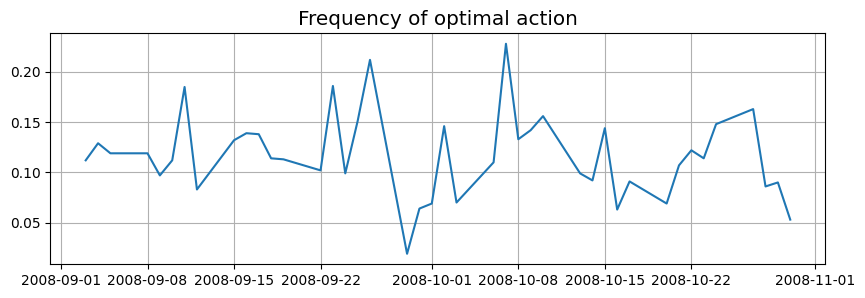

In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

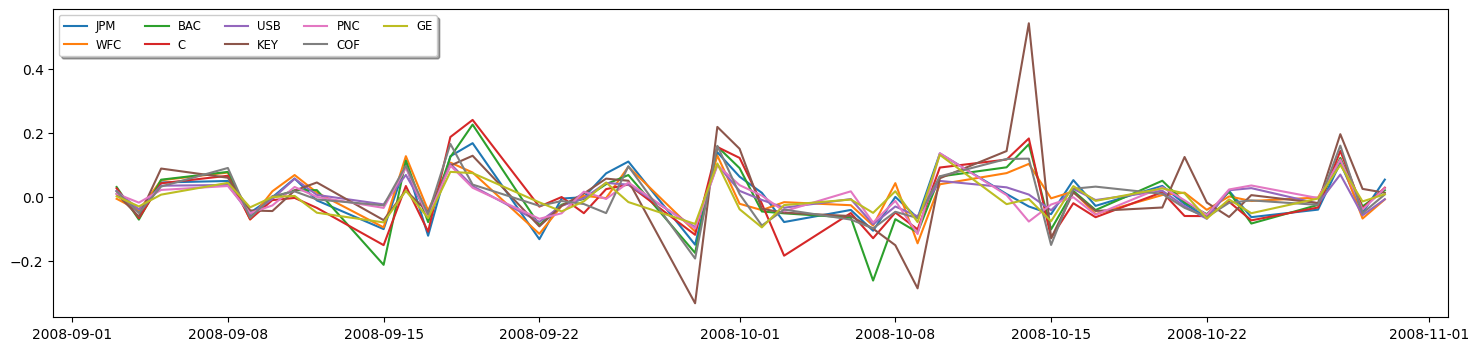

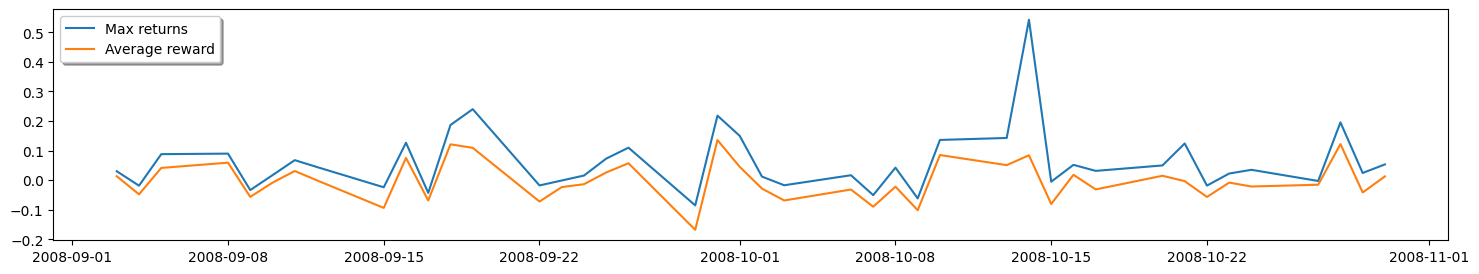

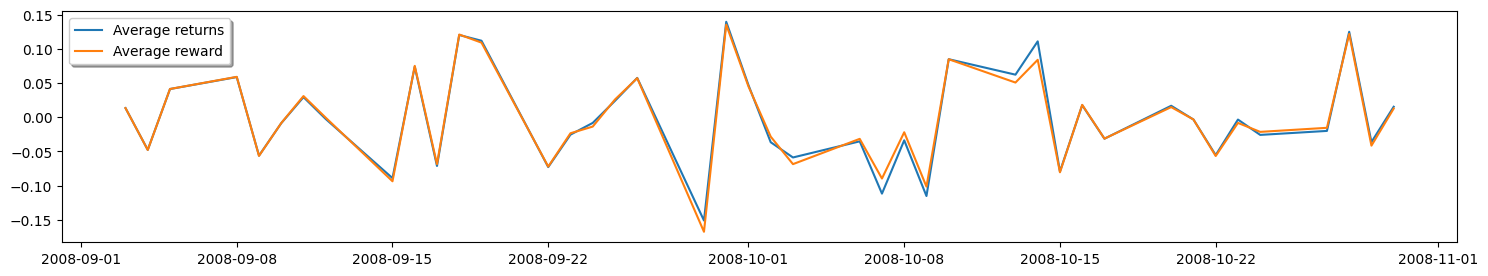

0.1171428571428572
-0.12835132207257205 1.0850068571288876
-0.2383475284761548 1.0557577424597304


In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],(pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_1, loc="upper left", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.max((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

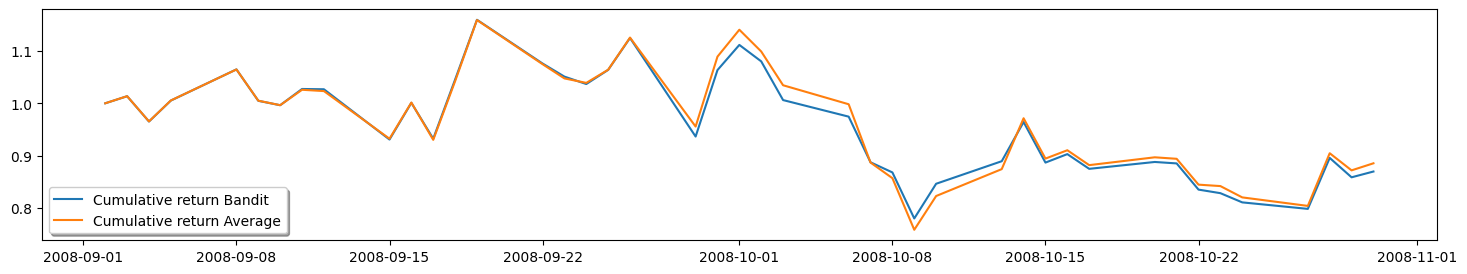

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_1[tt + HOLD - 1, :] - pdata_1[tt - 1, :]) / pdata_1[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

##### Epsilon-Greedy Algorithm on Cluster 2 Data

In [ ]:
# Bandit problem for stock selection
NK = pdata_2.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = pdata_2.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_2[tt + HOLD, aa_opt] - pdata_2[tt, aa_opt]) / pdata_2[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_2[tt + HOLD, :] - pdata_2[tt, :]) / pdata_2[tt, :])) / NEPISODES

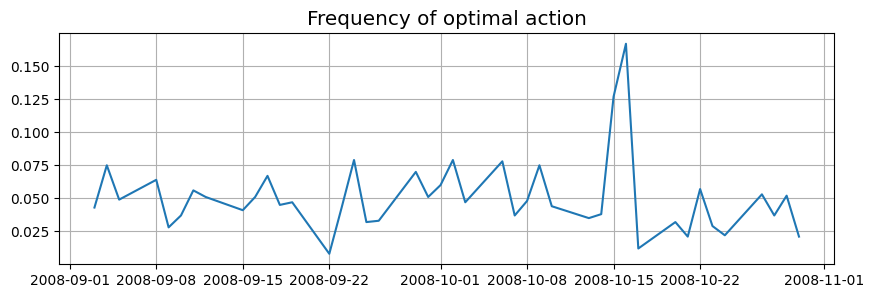

In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

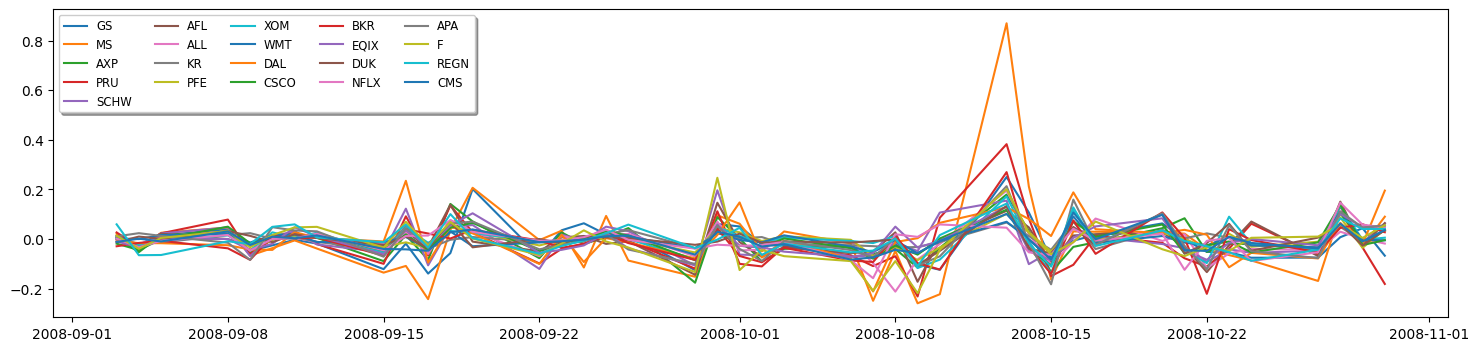

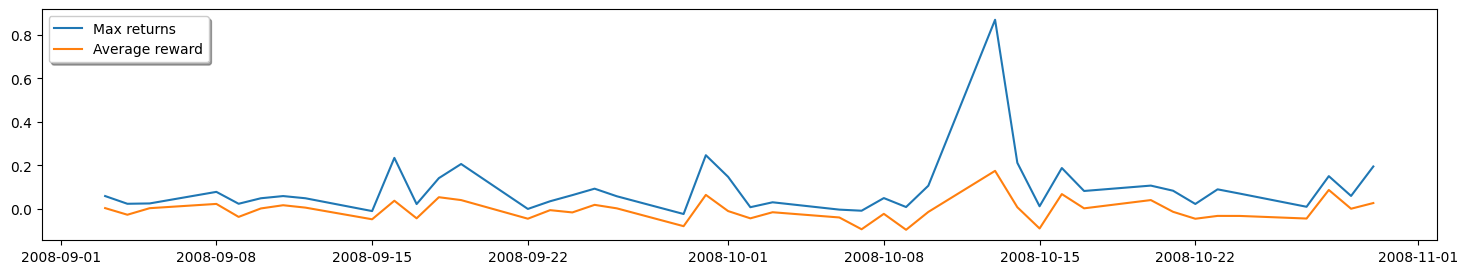

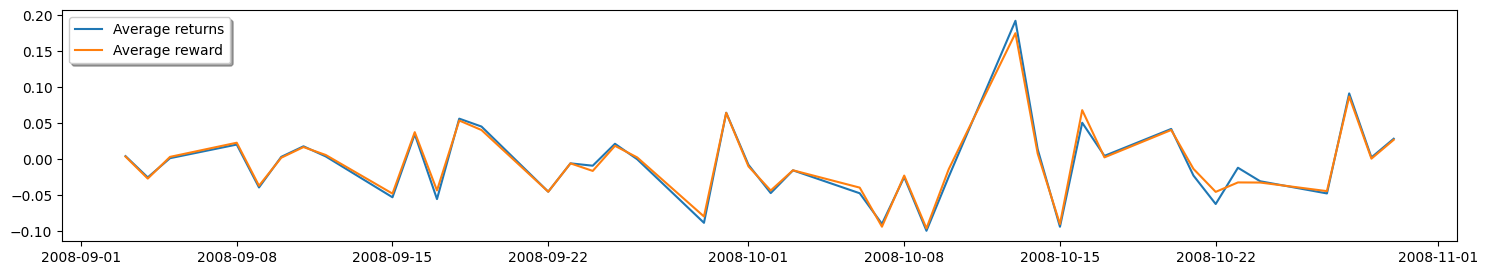

0.05097619047619051
-0.7579574945974678 0.842942966096153
-0.7050446495963145 0.7989183501324867


In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],(pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_2, loc="upper left", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.max((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

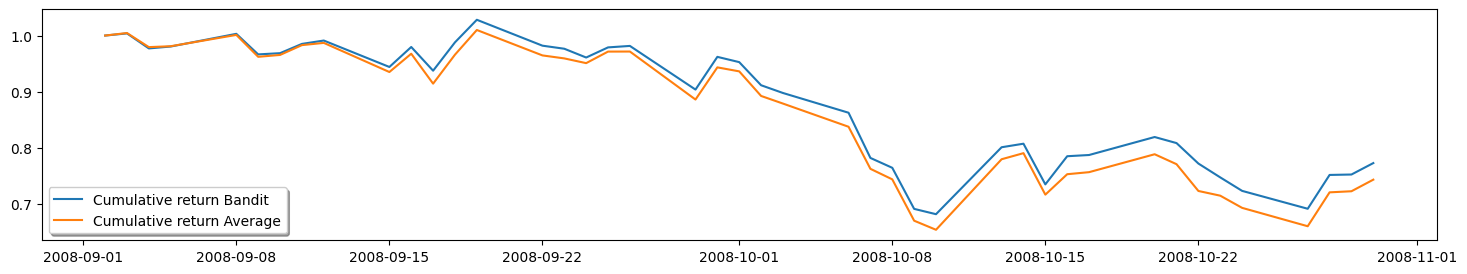

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_2[tt + HOLD - 1, :] - pdata_2[tt - 1, :]) / pdata_2[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

## **updating 30 data series.**

For this task, we are going to update the data of each of the selected securities by downloading the data for a different period of time say March 2020 to April 2020 perhaps to invstigate the impact of the begining of covid-19.

For perfoming the algorithms, we would keep the holding period but vary the eploration-eploitation parameter ε and the updating parameter α.

We are going to perform the algorithm on the 30 stocks first and then on the selected portfolios namely cluster 1 and 2. Using a holding period of 1 day, we are going to fix an $\epsilon$-greedy policy that uses $\varepsilon=0.15$. Then, we are going to compare the performance of the updating policy that averages across the past history of rewards and the updating policy that uses a fixed parameter $\alpha=0.5$. We will also adjust the degree of "unexploration" of the action relative to the steps completed with the introduction of UBC_WEIGHT= 2.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

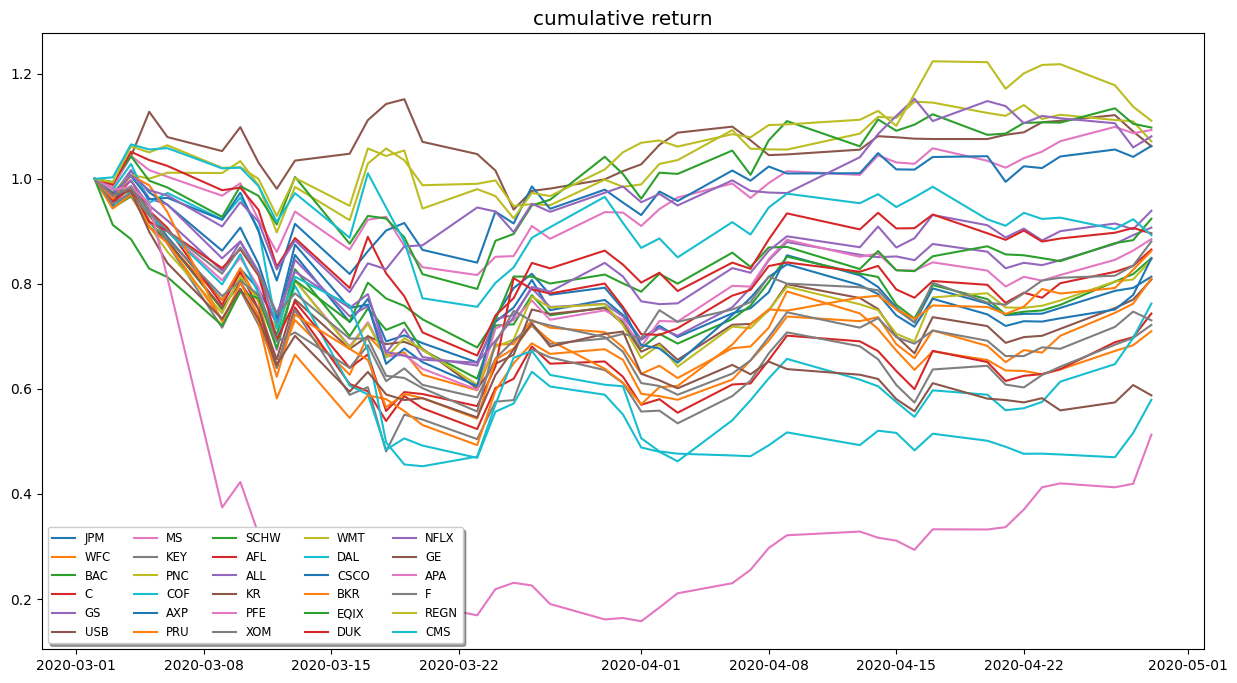

In [ ]:
tickers = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP",
           "PRU", "SCHW", "AFL", "ALL" , "KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "BKR",
           "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"
           ]

len(tickers)

start_date = "2020-03-01"
end_date = "2020-04-30"

df=pd.DataFrame()
df_ret=pd.DataFrame()
for tick in tickers:
  price=yf.download(tick, start=start_date, end=end_date)
  plt.plot(price["Adj Close"] / price["Adj Close"][0], label=tick)
  price=price.rename(columns={"Adj Close" : tick})
  price[tick+"ret"]=price[tick].pct_change()
  df=pd.concat([df, price[[tick]]], axis=1)
  df_ret=pd.concat([df, price[[tick+"ret"]]], axis=1)
pdata = df.to_numpy()
pdata_dates = pd.to_datetime(price.index, format = "%Y-%m-%d")
legend = plt.legend(loc="lower left", shadow=True, fontsize="small", ncol=5)
#legend_title = plt.gca().add_artist(plt.Text(0, 0, "Stock Tickers", fontsize="small", fontweight='bold'))
title="cumulative return"
plt.title(title, fontsize="x-large")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


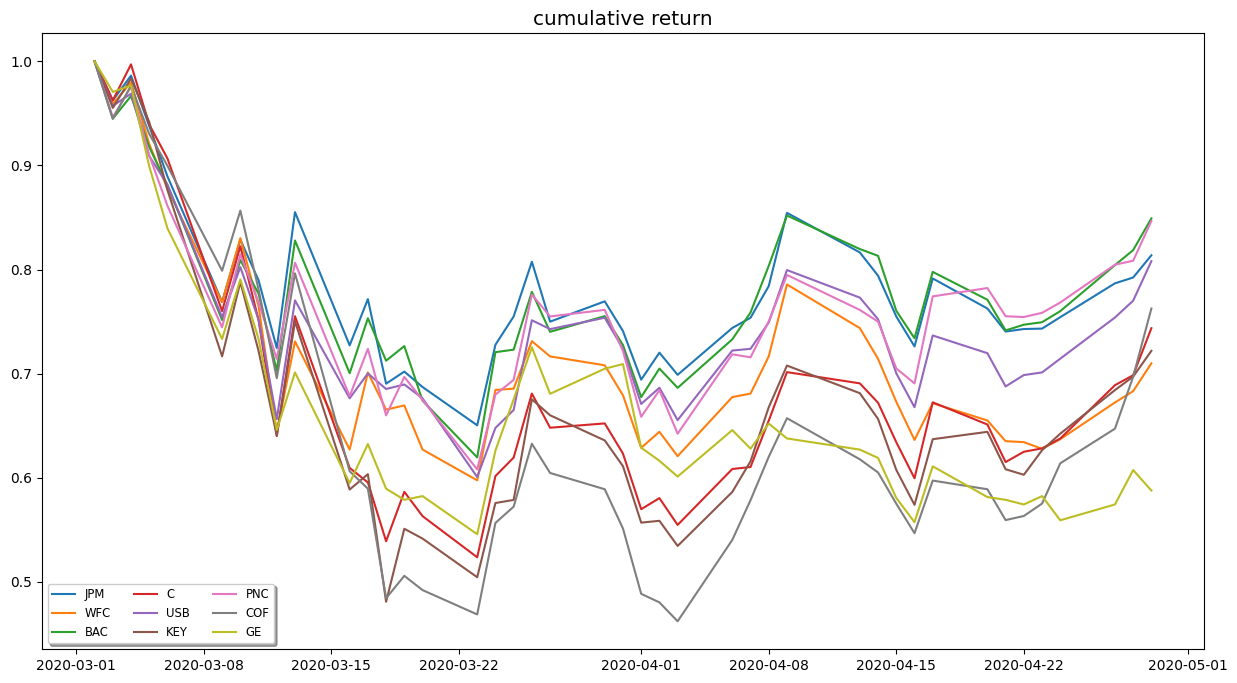

In [ ]:
tickers_1 = ['JPM', 'WFC', 'BAC', 'C', 'USB', 'KEY', 'PNC', 'COF', 'GE']

len(tickers_1)

start_date = "2020-03-01"
end_date = "2020-04-30"

df_1=pd.DataFrame()
df_ret_1=pd.DataFrame()
for tick in tickers_1:
  price_1=yf.download(tick, start=start_date, end=end_date)
  plt.plot(price_1["Adj Close"] / price_1["Adj Close"][0], label=tick)
  price_1=price_1.rename(columns={"Adj Close" : tick})
  price_1[tick+"ret"]=price_1[tick].pct_change()
  df_1=pd.concat([df_1, price_1[[tick]]], axis=1)
  df_ret_1=pd.concat([df_1, price_1[[tick+"ret"]]], axis=1)
pdata_1 = df_1.to_numpy()
pdata_dates_1 = pd.to_datetime(price_1.index, format = "%Y-%m-%d")
legend = plt.legend(loc="lower left", shadow=True, fontsize="small", ncol=3)
#legend_title = plt.gca().add_artist(plt.Text(0, 0, "Stock Tickers", fontsize="small", fontweight='bold'))
title="cumulative return"
plt.title(title, fontsize="x-large")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

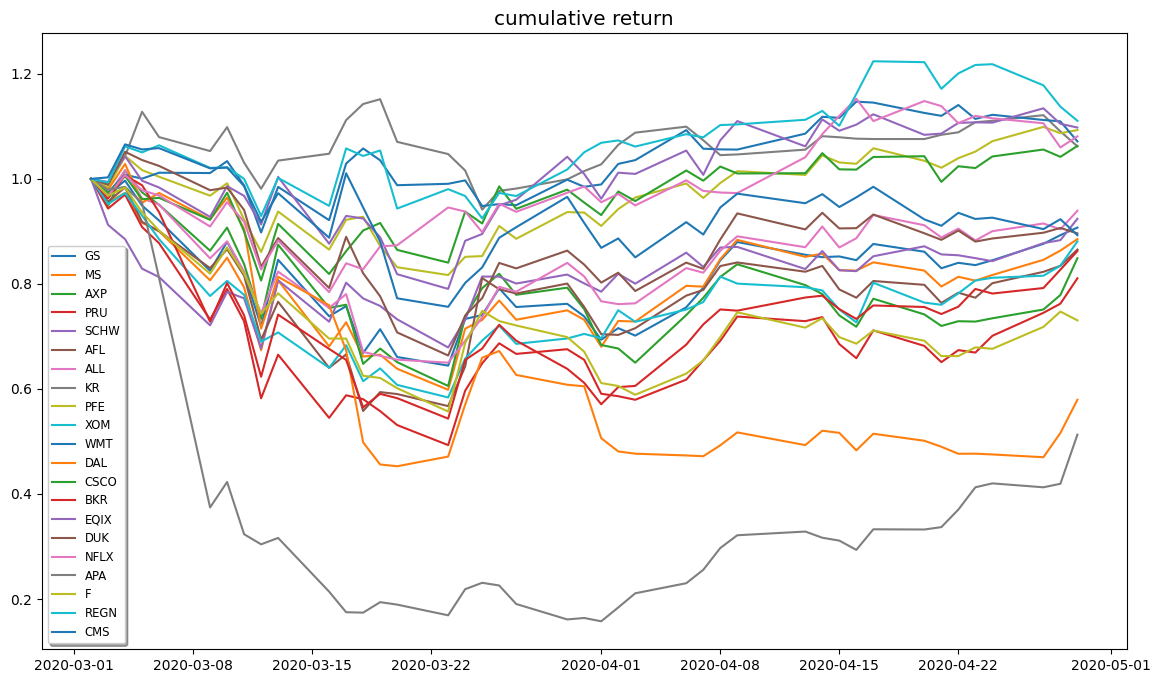

In [ ]:
tickers_2 = ['GS', 'MS', 'AXP', 'PRU', 'SCHW', 'AFL', 'ALL', 'KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'BKR', 'EQIX', 'DUK', 'NFLX', 'APA', 'F', 'REGN', 'CMS']

len(tickers_2)

start_date = "2020-03-01"
end_date = "2020-04-30"

df_2=pd.DataFrame()
df_ret_2=pd.DataFrame()
for tick in tickers_2:
  price_2=yf.download(tick, start=start_date, end=end_date)
  plt.plot(price_2["Adj Close"] / price_2["Adj Close"][0], label=tick)
  price_2=price_2.rename(columns={"Adj Close" : tick})
  price_2[tick+"ret"]=price_2[tick].pct_change()
  df_2=pd.concat([df_2, price_2[[tick]]], axis=1)
  df_ret_2=pd.concat([df_2, price_2[[tick+"ret"]]], axis=1)
pdata_2 = df_2.to_numpy()
pdata_dates_2 = pd.to_datetime(price_2.index, format = "%Y-%m-%d")
legend = plt.legend(loc="lower left", shadow=True, fontsize="small", ncol=1)
#legend_title = plt.gca().add_artist(plt.Text(0, 0, "Stock Tickers", fontsize="small", fontweight='bold'))
title="cumulative return"
plt.title(title, fontsize="x-large")
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.show()

## **Performing the Algorithms on the new data sets.**


#### 1. **UCB ALgorithm on the 30 Securities**

In [ ]:
# Bandit problem for stock selection

NK = pdata.shape[1]
EPSILON = 0.15
ALPHA = 0.5
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

# New Parameter
UBC_WEIGHT= 2  # degree of exploration parameter

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata[tt + HOLD, aa_opt] - pdata[tt, aa_opt]) / pdata[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        #qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/nactions[aa_opt])
        #print(qvalue)
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            # If an action has not been visited, simply give it maximum value across actions
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UBC_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata[tt + HOLD, :] - pdata[tt, :]) / pdata[tt, :])) / NEPISODES  # noQA E203

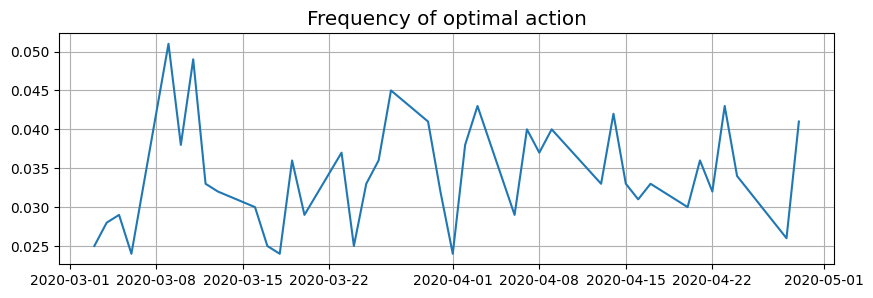

In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

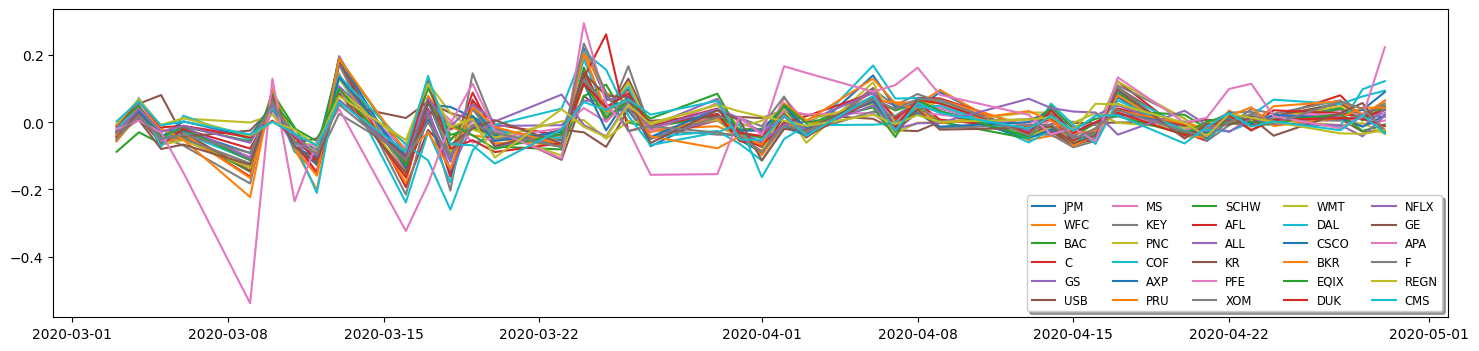

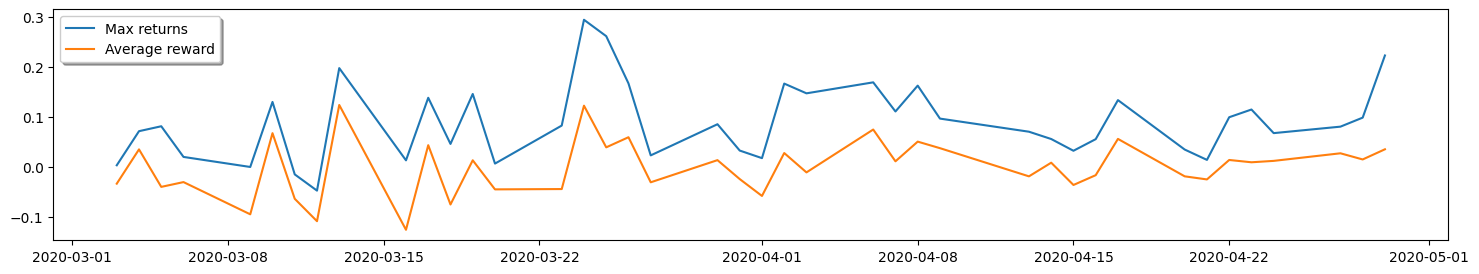

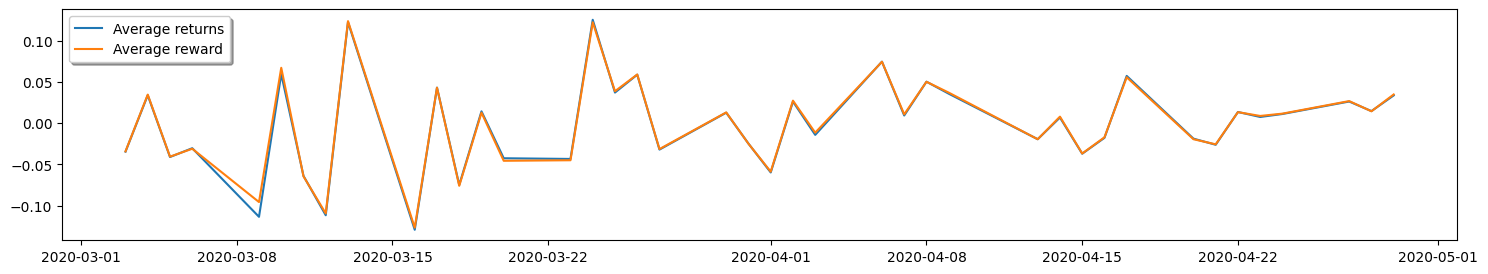

0.03402439024390246
-0.29939971197939674 0.8764664967605831
-0.13558309555866122 0.8635727401935961


In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]],(pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers, loc="lower right", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.max((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

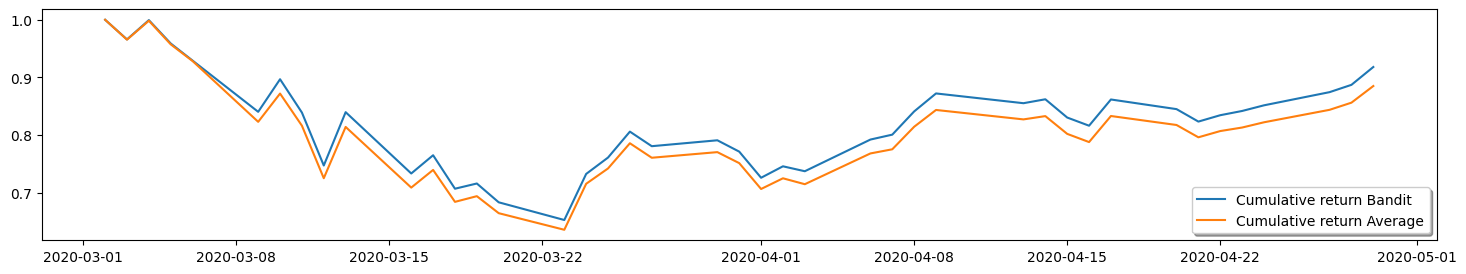

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower right", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#### UCB Algorithm on Updated Cluster 1 securities

In [ ]:
# Bandit problem for stock selection

NK = pdata_1.shape[1]
EPSILON = 0.15
ALPHA = 0.5
NEPISODES = 1000
HOLD = 1
TMAX = pdata_1.shape[0] - HOLD

# New Parameter
UBC_WEIGHT= 2  # degree of exploration parameter

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_1[tt + HOLD, aa_opt] - pdata_1[tt, aa_opt]) / pdata_1[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        #qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/nactions[aa_opt])
        #print(qvalue)
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            # If an action has not been visited, simply give it maximum value across actions
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UBC_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_1[tt + HOLD, :] - pdata_1[tt, :]) / pdata_1[tt, :])) / NEPISODES  # noQA E203

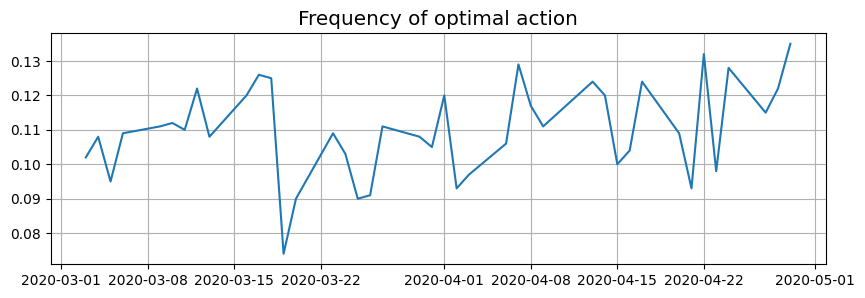

In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

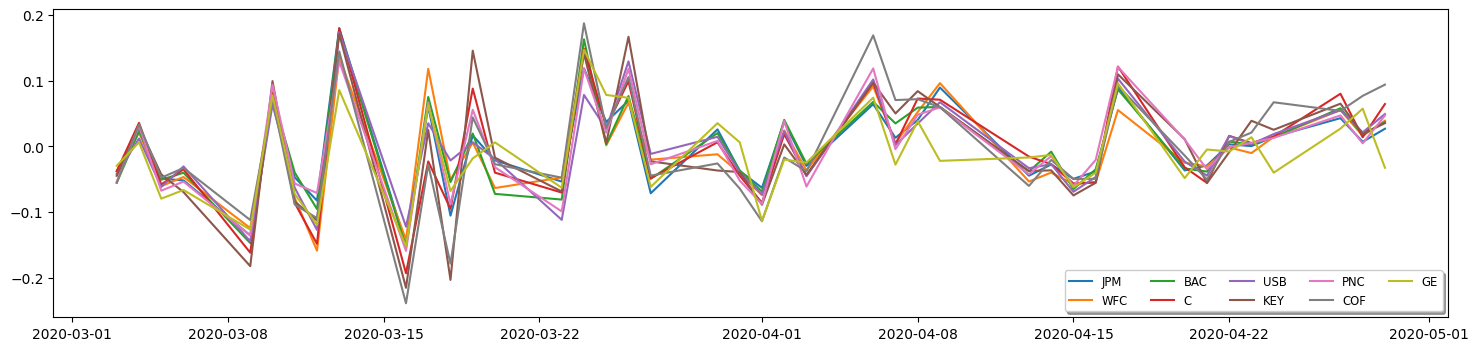

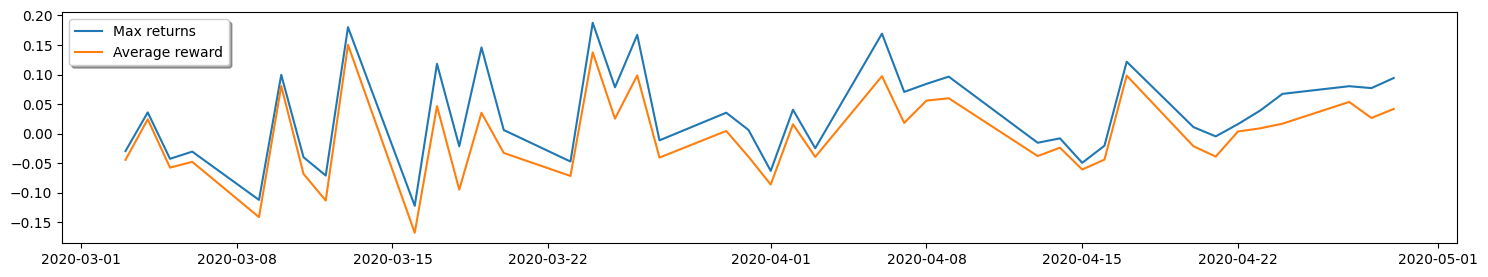

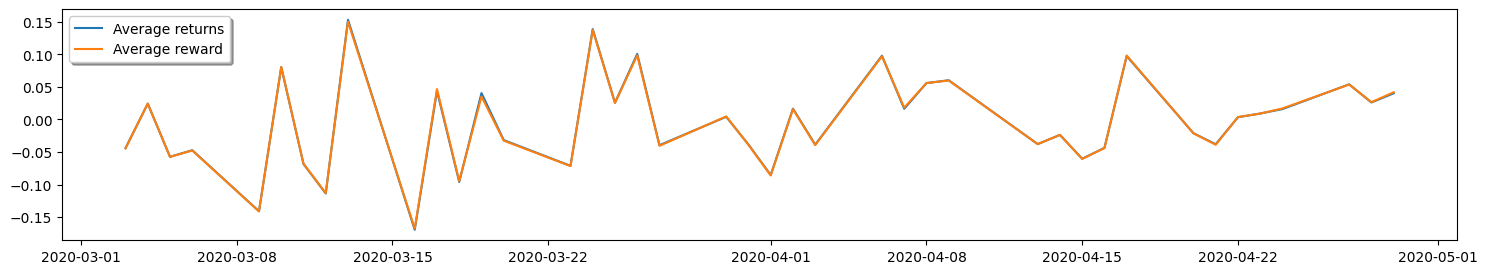

0.10990243902439029
-0.6299785473623191 1.1201008812707098
-0.643948625587246 1.1143101629460916


In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],(pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_1, loc="lower right", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.max((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

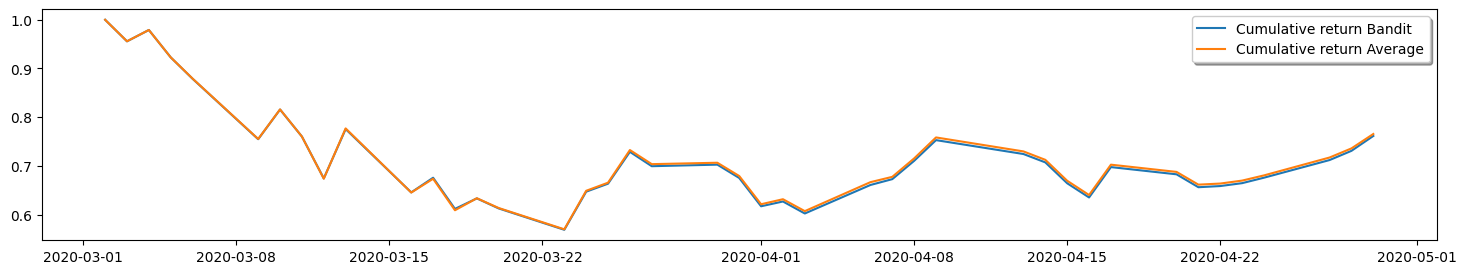

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_1[tt + HOLD - 1, :] - pdata_1[tt - 1, :]) / pdata_1[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="upper right", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#### UCB Algorithm on Updated Cluster 2 securities

In [ ]:
# Bandit problem for stock selection

NK = pdata_2.shape[1]
EPSILON = 0.15
ALPHA = 0.5
NEPISODES = 1000
HOLD = 1
TMAX = pdata_2.shape[0] - HOLD

# New Parameter
UBC_WEIGHT= 2  # degree of exploration parameter

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_2[tt + HOLD, aa_opt] - pdata_2[tt, aa_opt]) / pdata_2[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        #qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/nactions[aa_opt])
        #print(qvalue)
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            # If an action has not been visited, simply give it maximum value across actions
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UBC_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_2[tt + HOLD, :] - pdata_2[tt, :]) / pdata_2[tt, :])) / NEPISODES  # noQA E203

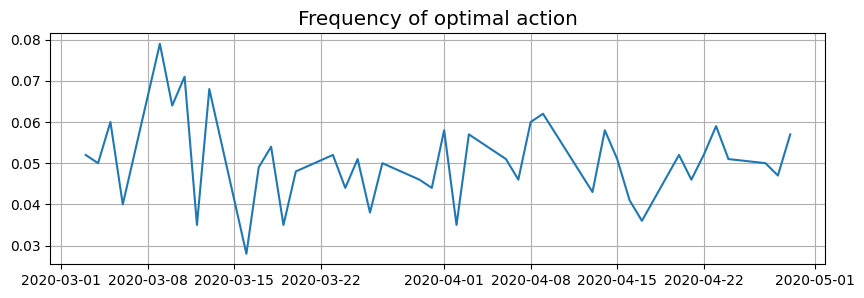

In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

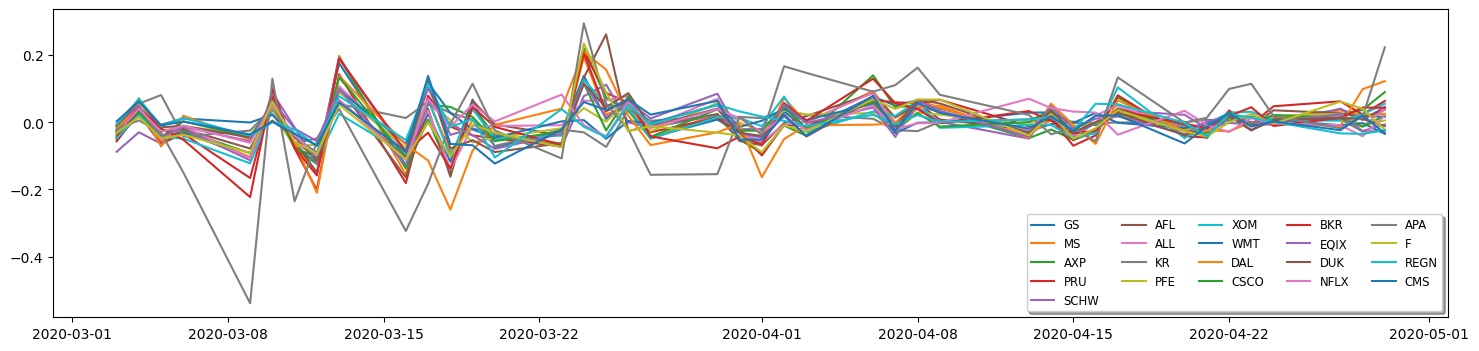

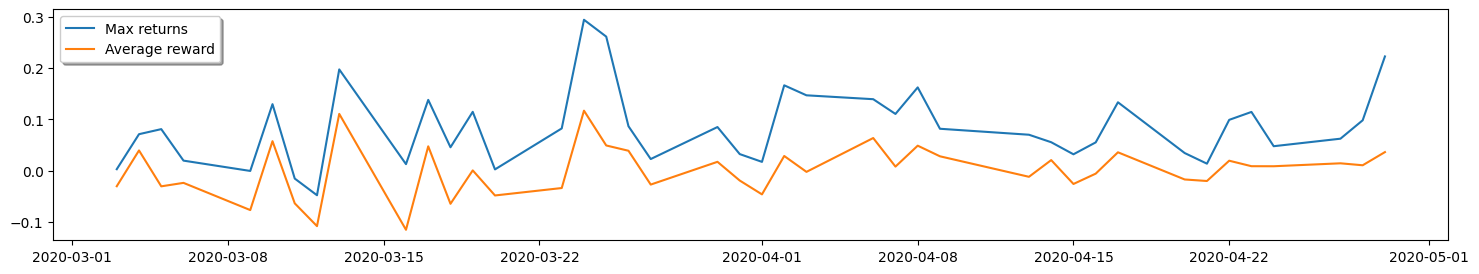

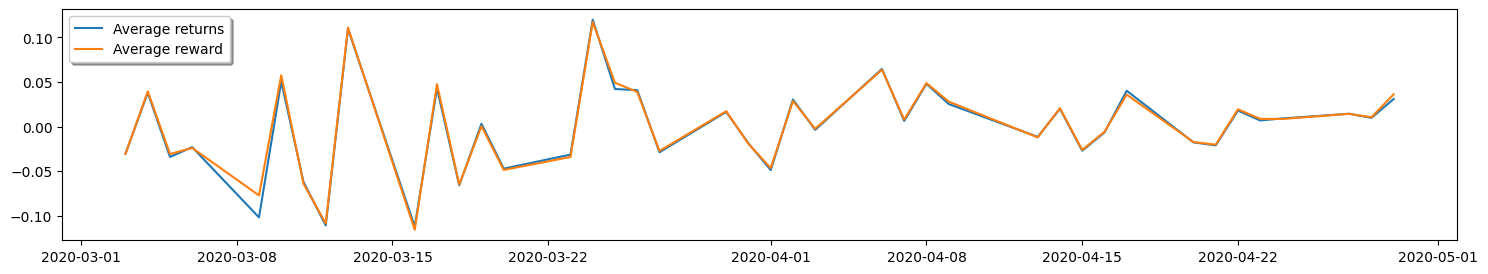

0.05048780487804881
-0.0793966737901296 0.7884441179773355
0.23926054112617434 0.7783432350145056


In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],(pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_2, loc="lower right", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.max((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

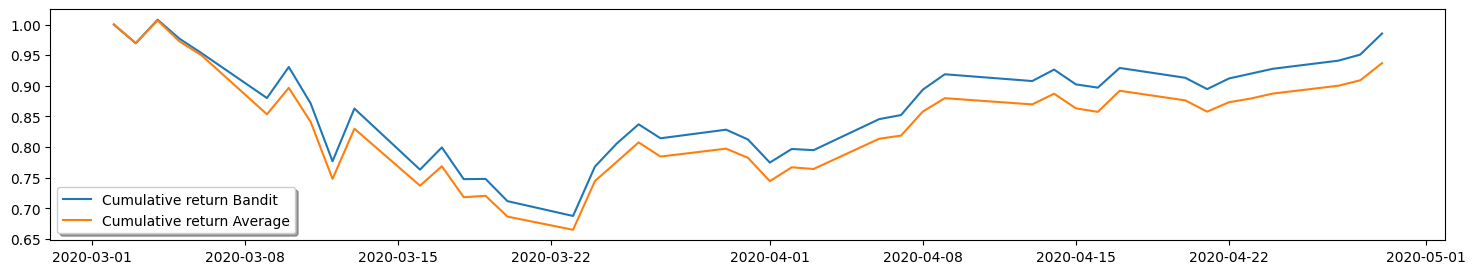

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_2[tt + HOLD - 1, :] - pdata_2[tt - 1, :]) / pdata_2[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#### 1. **Epsilon-Greedy ALgorithm on the Updated 30 Securities**

In [ ]:
# Bandit problem for stock selection
NK = pdata.shape[1]
EPSILON = 0.15
ALPHA = 0.5
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata[tt + HOLD, aa_opt] - pdata[tt, aa_opt]) / pdata[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata[tt + HOLD, :] - pdata[tt, :]) / pdata[tt, :])) / NEPISODES

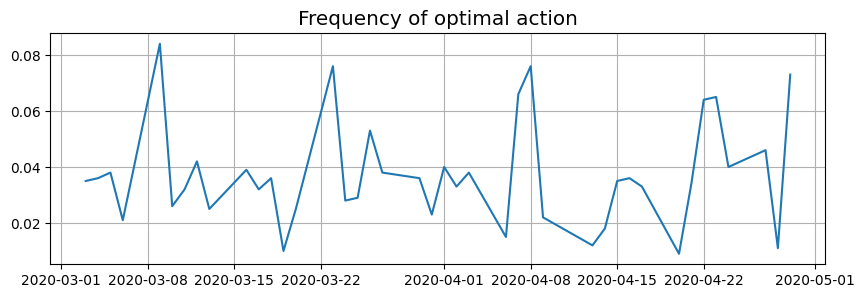

In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

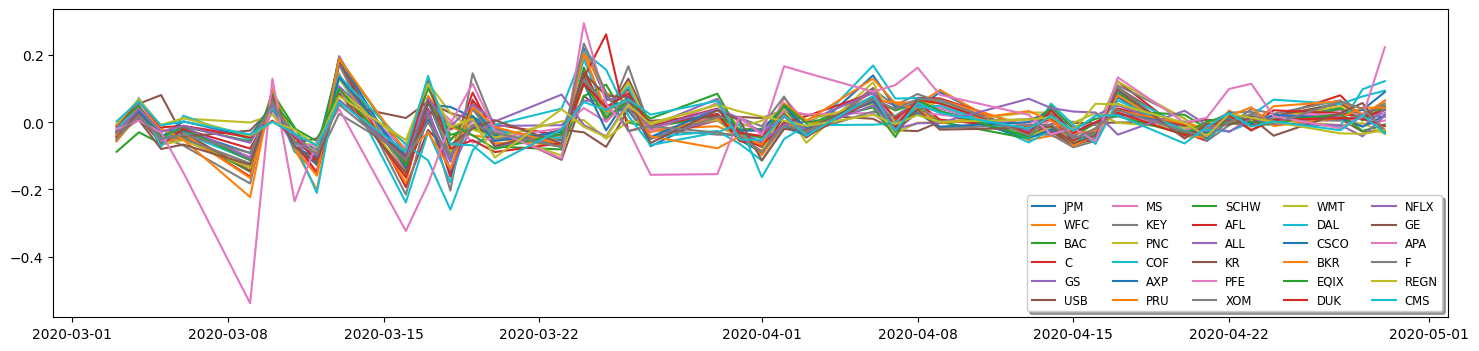

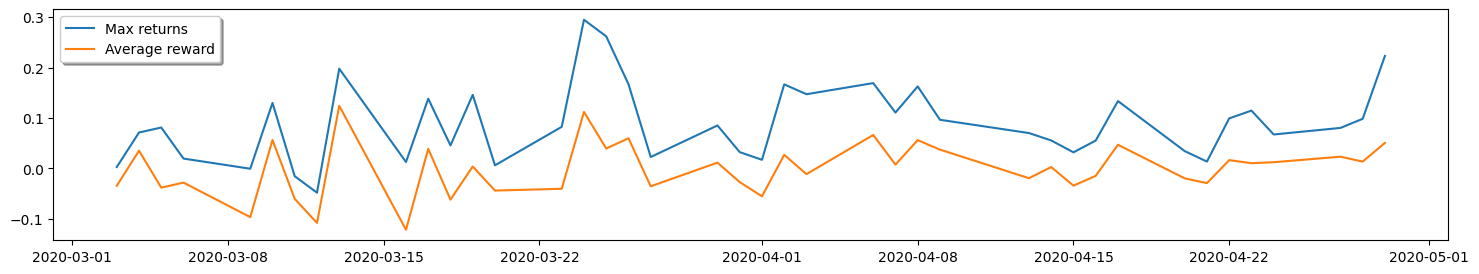

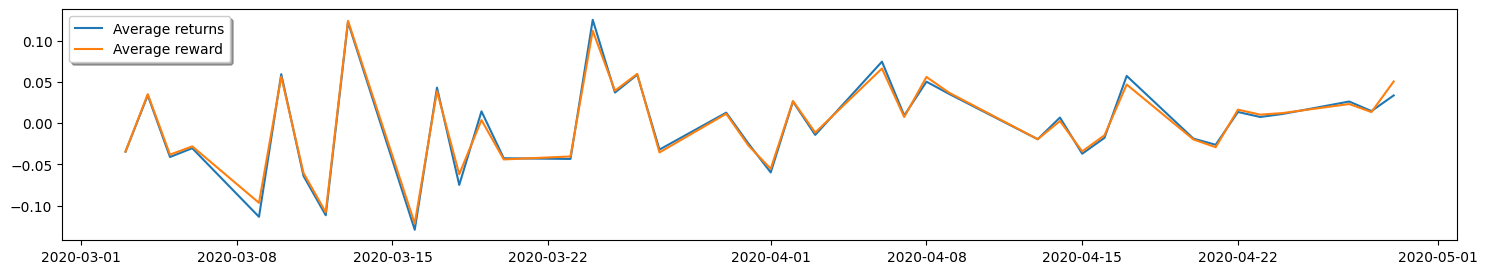

0.03731707317073173
-0.29939971197939674 0.8764664967605831
-0.155873334986108 0.8310471737261235


In [ ]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]],(pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers, loc="lower right", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.max((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates[HOLD : pdata.shape[0]],np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

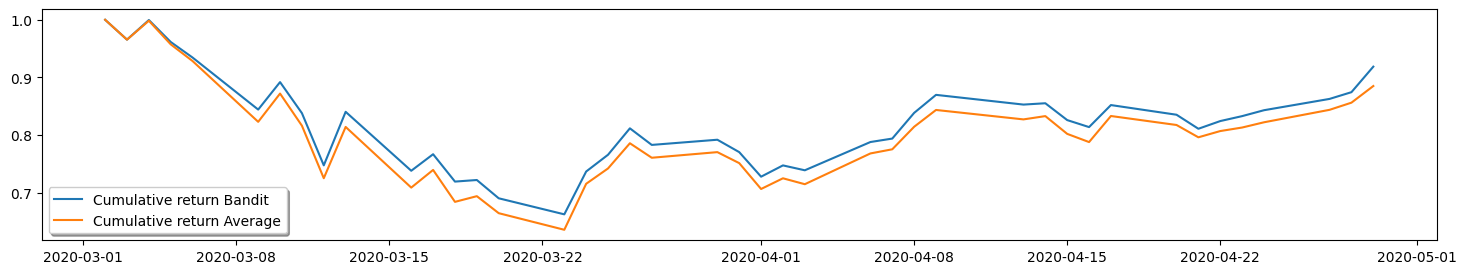

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates[HOLD - 1 : pdata.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#### 2. **Epsilon-Greedy ALgorithm on the Updated Cluster 1 Securities**

In [ ]:
# Bandit problem for stock selection
NK = pdata_1.shape[1]
EPSILON = 0.15
ALPHA = 0.5
NEPISODES = 1000
HOLD = 1
TMAX = pdata_1.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_1[tt + HOLD, aa_opt] - pdata_1[tt, aa_opt]) / pdata_1[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_1[tt + HOLD, :] - pdata_1[tt, :]) / pdata_1[tt, :])) / NEPISODES

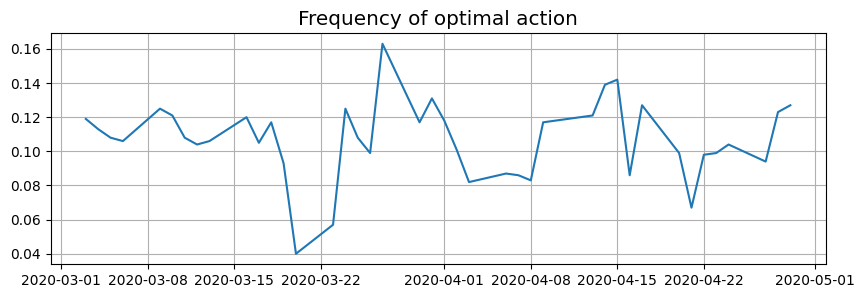

In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

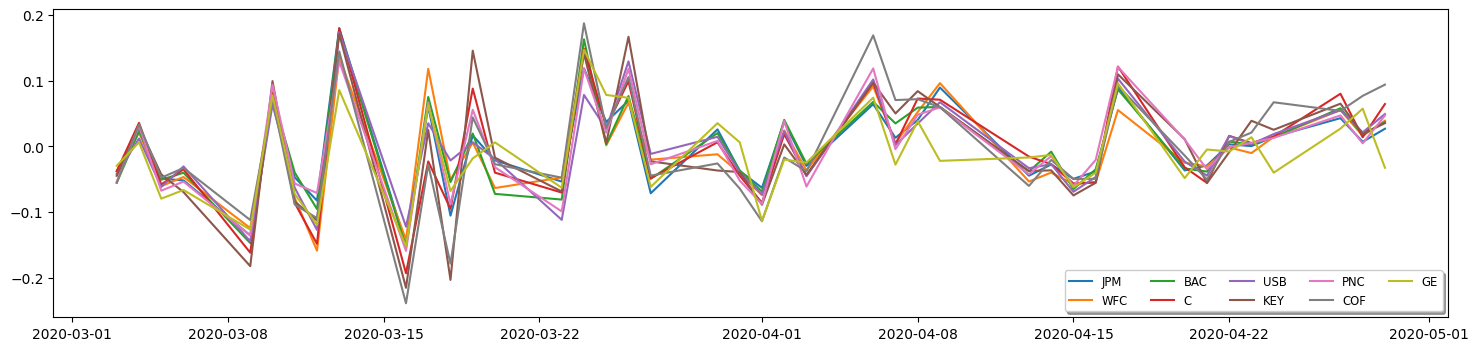

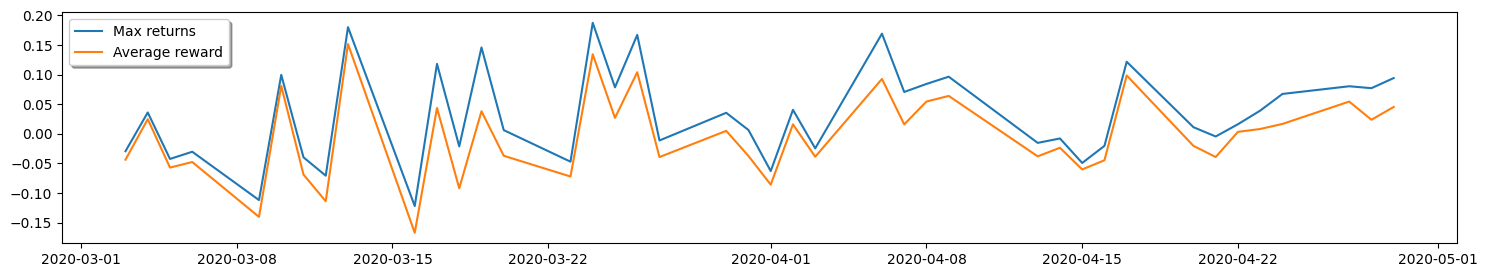

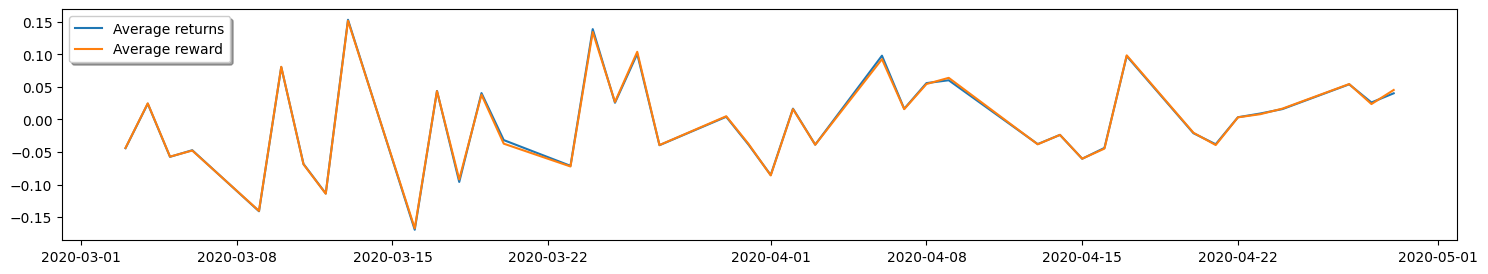

0.10695121951219518
-0.6299785473623191 1.1201008812707098
-0.6408700008382624 1.1143556460415533


In [ ]:
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],(pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_1, loc="lower right", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.max((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]],np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_1[HOLD : pdata_1.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_1[HOLD : pdata_1.shape[0], :] - pdata_1[0:TMAX, :]) / pdata_1[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

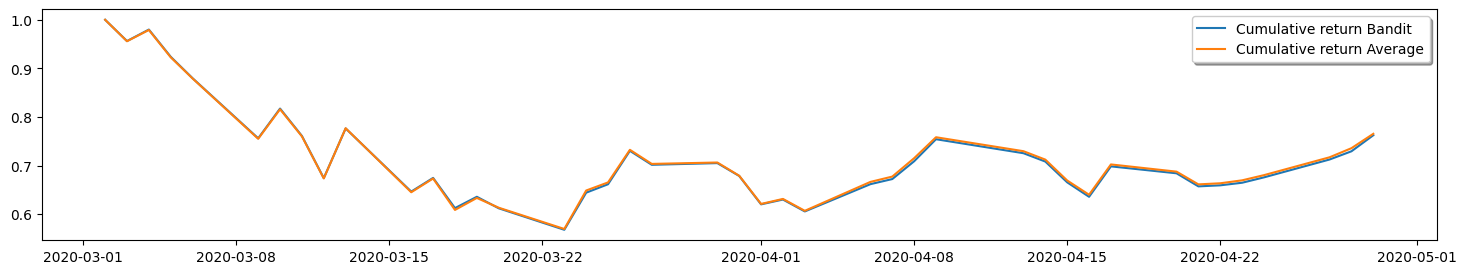

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_1[tt + HOLD - 1, :] - pdata_1[tt - 1, :]) / pdata_1[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_1[HOLD - 1 : pdata_1.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="upper right", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

#### 3. **Epsilon-Greedy ALgorithm on the Updated Cluster 2 Securities**

In [ ]:
# Bandit problem for stock selection
NK = pdata_2.shape[1]
EPSILON = 0.15
ALPHA = 0.5
NEPISODES = 1000
HOLD = 1
TMAX = pdata_2.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (pdata_2[tt + HOLD, aa_opt] - pdata_2[tt, aa_opt]) / pdata_2[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (aa_opt == np.argmax((pdata_2[tt + HOLD, :] - pdata_2[tt, :]) / pdata_2[tt, :])) / NEPISODES

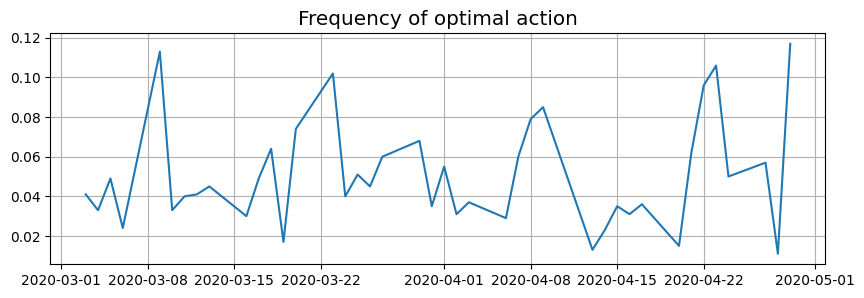

In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

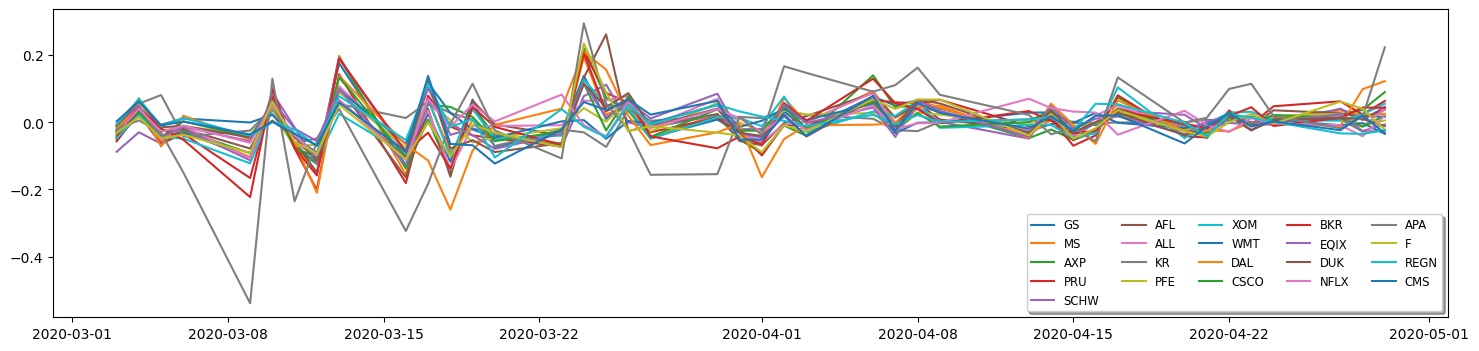

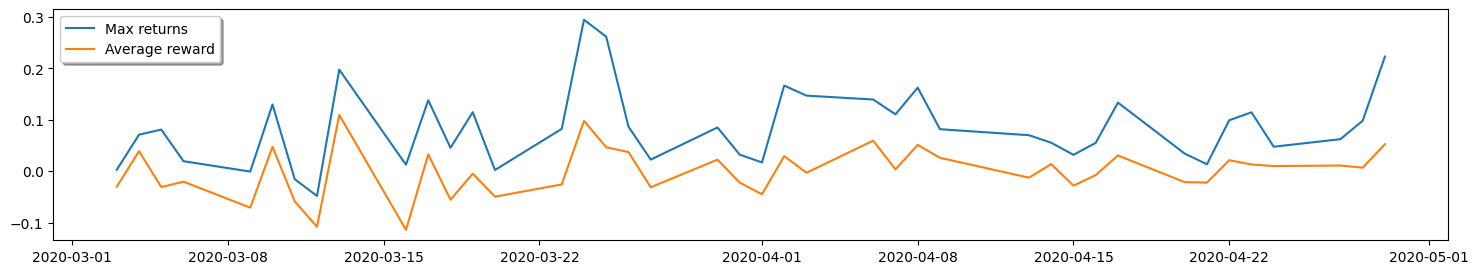

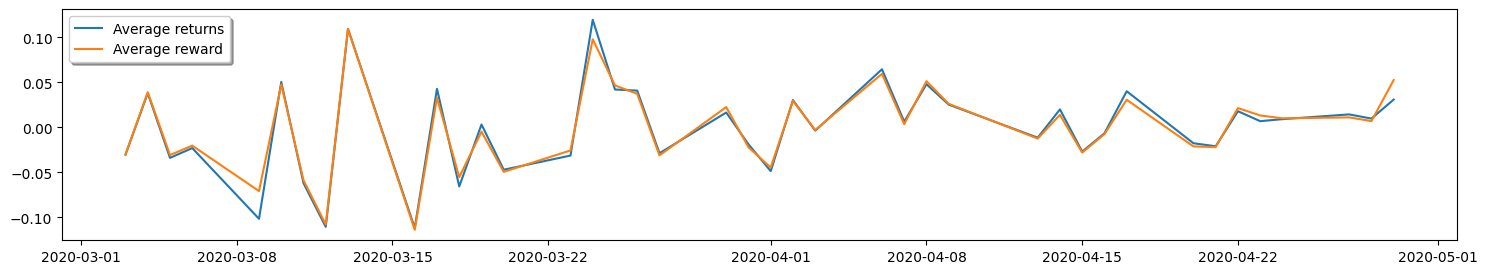

0.05078048780487809
-0.0793966737901296 0.7884441179773355
0.026766713248254748 0.7410340959707736


In [ ]:
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],(pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],)  # noQA E203
#plt.legend(tickers)
legend = plt.legend(tickers_2, loc="lower right", shadow=True, fontsize="small", ncol=5)
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.max((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1), label="Max returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]],np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :], axis=1),label="Average returns",)  # noQA E203
plt.plot(pdata_dates_2[HOLD : pdata_2.shape[0]], reward_avg, label="Average reward")  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print((1+ np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :]))** (250 / HOLD)- 1,np.sqrt(250 / HOLD)* np.std(np.mean((pdata_2[HOLD : pdata_2.shape[0], :] - pdata_2[0:TMAX, :]) / pdata_2[0:TMAX, :],axis=1,)),)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print((1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(reward_avg),)

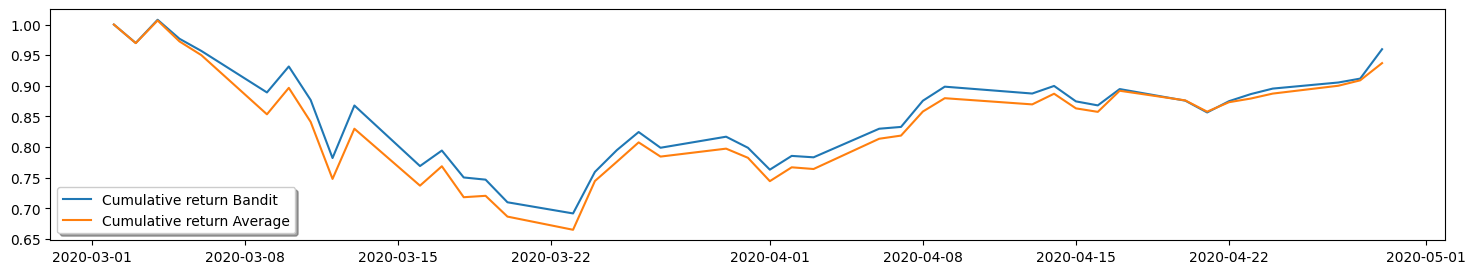

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata_2[tt + HOLD - 1, :] - pdata_2[tt - 1, :]) / pdata_2[tt - 1, :])  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 0],label="Cumulative return Bandit",)  # noQA E203
plt.plot(pdata_dates_2[HOLD - 1 : pdata_2.shape[0]],return_cumulative[:, 1],label="Cumulative return Average",)  # noQA E203
legend = plt.legend(loc="lower left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()